# Исследование объявлений о продаже квартир

**Описание задачи**

В нашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Наша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма.

**Краткий план действий:**

1. Загрузка и осмотр данных.
2. Предобработка данных.
3. Добавим в датасет дополнительные столбцы (цена квадратного метра, месяц публикации объявления, тип этажа квартиры и др.)
4. Исследовательский анализ данных

### Осмотр данных

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

None

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


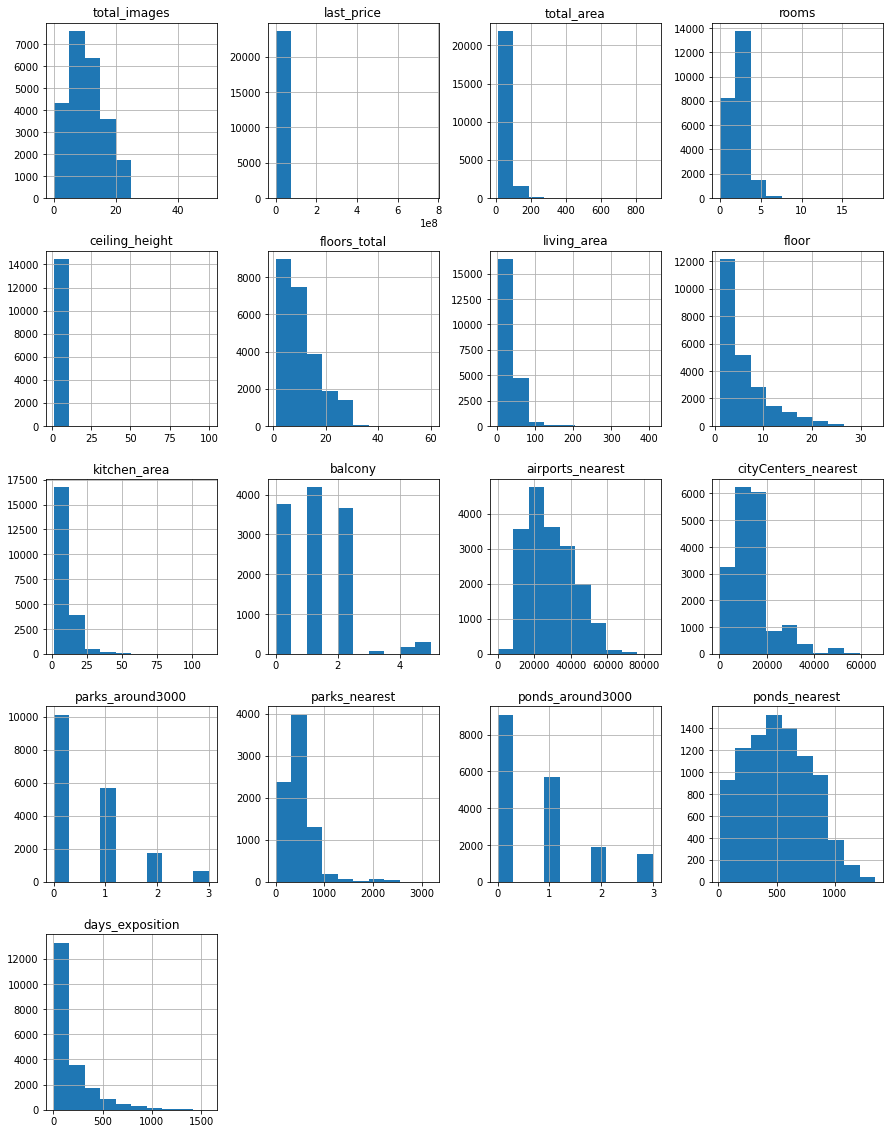

In [ ]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep ='\t')
display(data.head(10))
display(data.info())
display(data.describe())
data.hist(figsize=(15, 20));

#### Вывод
 В датасете представлено 22 столбца:
* airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
* balcony — число балконов
* ceiling_height — высота потолков (м)
* cityCenters_nearest — расстояние до центра города (м)
* days_exposition — сколько дней было размещено объявление (от публикации до снятия)
* first_day_exposition — дата публикации
* floor — этаж
* floors_total — всего этажей в доме
* is_apartment — апартаменты (булев тип)
* kitchen_area — площадь кухни в квадратных метрах (м²)
* last_price — цена на момент снятия с публикации
* living_area — жилая площадь в квадратных метрах (м²)
* locality_name — название населённого пункта
* open_plan — свободная планировка (булев тип)
* parks_around3000 — число парков в радиусе 3 км
* parks_nearest — расстояние до ближайшего парка (м)
* ponds_around3000 — число водоёмов в радиусе 3 км
* ponds_nearest — расстояние до ближайшего водоёма (м)
* rooms — число комнат
* studio — квартира-студия (булев тип)
* total_area — общая площадь квартиры в квадратных метрах (м²)
* total_images — число фотографий квартиры в объявлении

Исходя из общей информации можно выделить следующие проблемы в данных:
- количество значений в столбцах разное, что указывает на наличие пропусков, которые могут быть в свою очередь взаимосвязаны со значениями в других столбцах;
- некоторые типы значений не удобны для анализа;
- использовав метод describe(), можно заметить, что имеются вбросы. Например, минимальная высота потолка в датасете 1м, а максимальная 100м; максимальное значение в floors_total равно 60, при том что самое высокое жилое здание в Санкт-Петербурге и соседних населенных пунктах имеет 37 этажей (жилой комплекс «Князь Александр Невский»).

### Предобработка данных

In [ ]:
# переименовываем столбцы в соответствии со "змеиным" регистром
data = data.rename(
    columns={
        'cityCenters_nearest' : 'city_centers_nearest',
        'parks_around3000' : 'parks_around_3000',
        'ponds_around3000' : 'ponds_around_3000'
    }
)

#### Обработка дубликатов

In [ ]:
# проверяем датасет на наличие явных дубликатов
display(data.duplicated().sum())

0

Проверим, нет ли неявных дубликатов в названиях локации:

In [ ]:
data['locality_name'] = data['locality_name'].str.lower() # приводим названия локаций к нижнему регистру
display(data['locality_name'].unique()) # выводим уникальные названия локаций

array(['санкт-петербург', 'посёлок шушары', 'городской посёлок янино-1',
       'посёлок парголово', 'посёлок мурино', 'ломоносов', 'сертолово',
       'петергоф', 'пушкин', 'деревня кудрово', 'коммунар', 'колпино',
       'поселок городского типа красный бор', 'гатчина', 'поселок мурино',
       'деревня фёдоровское', 'выборг', 'кронштадт', 'кировск',
       'деревня новое девяткино', 'посёлок металлострой',
       'посёлок городского типа лебяжье',
       'посёлок городского типа сиверский', 'поселок молодцово',
       'поселок городского типа кузьмоловский',
       'садовое товарищество новая ропша', 'павловск',
       'деревня пикколово', 'всеволожск', 'волхов', 'кингисепп',
       'приозерск', 'сестрорецк', 'деревня куттузи', 'посёлок аннино',
       'поселок городского типа ефимовский', 'посёлок плодовое',
       'деревня заклинье', 'поселок торковичи', 'поселок первомайское',
       'красное село', 'посёлок понтонный', 'сясьстрой', 'деревня старая',
       'деревня лесколово', '

Можно заметить, что в данных присутствуют неявные дубликаты - "посёлок мурино","поселок мурино", "мурино" и др.
Поменяем буквы ё на е, унифицируем названия типов населенных пунктов:

In [ ]:
data['locality_name'] = data['locality_name'].str.replace('ё', 'е')
data['locality_name'] = data['locality_name'].str.replace('городской поселок', 'поселок городского типа')
data['locality_name'] = data['locality_name'].str.replace('поселок мурино', 'мурино')
data['locality_name'] = data['locality_name'].str.replace('поселок кудрово', 'кудрово')
data['locality_name'] = data['locality_name'].str.replace('деревня', 'поселок')
data['locality_name'] = data['locality_name'].str.replace('коттеджный поселок', 'поселок')
data['locality_name'] = data['locality_name'].str.replace('садоводческое некоммерческое товарищество', 'садовое товарищество')
display(data['locality_name'].unique())

array(['санкт-петербург', 'поселок шушары',
       'поселок городского типа янино-1', 'поселок парголово', 'мурино',
       'ломоносов', 'сертолово', 'петергоф', 'пушкин', 'поселок кудрово',
       'коммунар', 'колпино', 'поселок городского типа красный бор',
       'гатчина', 'поселок федоровское', 'выборг', 'кронштадт', 'кировск',
       'поселок новое девяткино', 'поселок металлострой',
       'поселок городского типа лебяжье',
       'поселок городского типа сиверский', 'поселок молодцово',
       'поселок городского типа кузьмоловский',
       'садовое товарищество новая ропша', 'павловск',
       'поселок пикколово', 'всеволожск', 'волхов', 'кингисепп',
       'приозерск', 'сестрорецк', 'поселок куттузи', 'поселок аннино',
       'поселок городского типа ефимовский', 'поселок плодовое',
       'поселок заклинье', 'поселок торковичи', 'поселок первомайское',
       'красное село', 'поселок понтонный', 'сясьстрой', 'поселок старая',
       'поселок лесколово', 'поселок новый свет',

In [ ]:
# выведем количество уникальных наименований
display(data.locality_name.nunique())

# проверяем датасет на наличие явных дубликатов
display(data.duplicated().sum())

316

0

#### Работа с пропусками

In [ ]:
# находим количество пропусков в каждом столбце
display(data.isna().sum())

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around_3000        5518
parks_nearest           15620
ponds_around_3000        5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [ ]:
# функция для построения барплота количества пропущенных значений

def pass_value_barh_1(df):

    fig, ax = plt.subplots(figsize=(19, 6))

    try:
        (
            (df.isna().mean()*100)
            .to_frame()
            .rename(columns = {0:'space'})
            .query('space > 0')
            .sort_values(by='space', ascending=True)
            .plot(kind='barh', figsize=(19,6), legend=False, fontsize=16, ax = ax)

        );

        plt.title('Пропущенные значения, %' + "\n", fontsize=22, color='SteelBlue')
        plt.xlabel('Процент пропусков', fontsize=22)
        plt.ylabel('Столбцы с пропусками', fontsize=22)

        plt.xlim(0, 100)

        for i in ax.patches:
            plt.text(i.get_width()+0.2, i.get_y()+0.1,
                     str(round((i.get_width()), 1)),
                     fontsize=14,
                     color='black')

    except:
        print('пропусков не осталось :) или произошла ошибка в первой части функции')

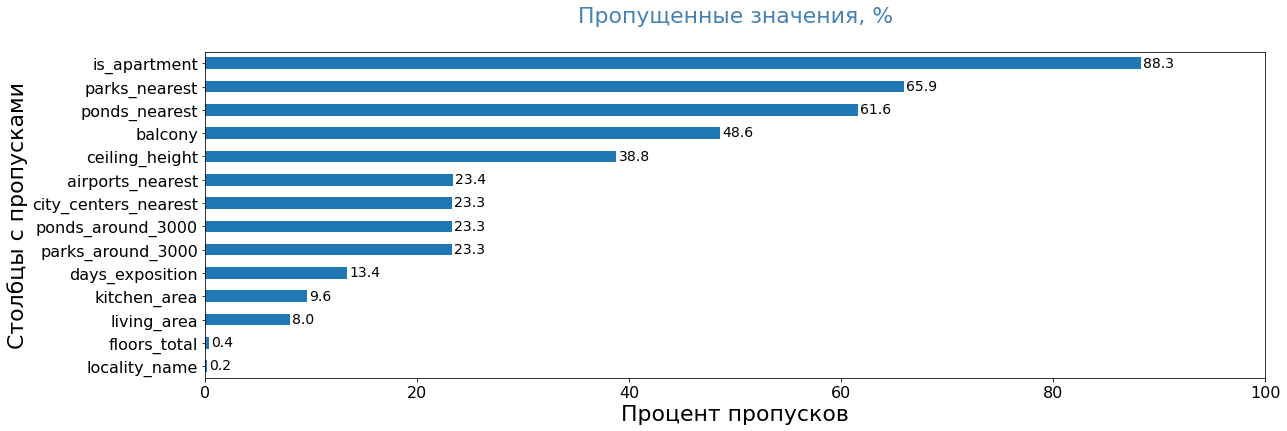

In [ ]:
pass_value_barh_1(data)

**`ceiling_height`**

Пропущенных значений в `ceiling_height` достаточно много, при этом данный параметр нам понадобится для анализа в далнейшем.
Методом describe() находим, что медиана высоты потолков составляет 2.65 м, а среднее 2.77 м.
Если руководствоваться градостроительными нормами и правилами, то эти цифры соответствуют реальности.

In [ ]:
display(data['ceiling_height'].mean())
display(data['ceiling_height'].median())

2.77149889685604

2.65

Учитывая, что в данных присутствуют вбросы, заменим пропуски в `ceiling_height` на медианное значение высоты потолков.

In [ ]:
data['ceiling_height'] = data['ceiling_height'].fillna(2.65)
display(data['ceiling_height'].isna().sum())

0

**`locality_name`**

Восстановить пропущенные значения в столбце `locality_name` не представляется возможным. Отметим, что данная категория играет одну из ключевых ролей в исследовании (мы изучаем рынок Спб и ближайших населенных пунктов, нет гарантии, что объекты в этих объявлениях расположены в интересуемых нас локациях) и к тому же имеет небольшое количество пропусков - всего 49. Удалим строки с неизвестными локациями:

In [ ]:
data = data.dropna(subset=['locality_name'])
display(data['locality_name'].isna().sum())

0

**`is_apartment`**

Пропуски в данном столбце составляют большую часть. Правовой статус апартаментов и квартир в законе обозначен достаточно четко, поэтому будем исходить из логики, что если в объявлении явно не указана категория "апартаменты", то это не она. Заменим пропущенные значения на "False", изменив тип данных на bool в соответствии с документацией:

In [ ]:
# вместо пропущенных значений подставляем False
data['is_apartment'] = data['is_apartment'].fillna(False)
# меняем тип данных на bool
data['is_apartment'] = data['is_apartment'].astype('bool')

display(data['is_apartment'].value_counts())

False    23600
True        50
Name: is_apartment, dtype: int64

**`floors_total`**

Восстановить данные с общим количеством этажей проблематично, это можно было бы сделать, зная общую высоту дома. Разброс по этажности даже в пределах одного населенного пункта может быть очень большой (особенно в Спб).

Количество пропусков в данной категории составляет всего 85, выведем все строки с пропущенными, чтобы убедиться, что данные разнородны и удаление не приведет к искажению результатов исследования (например, это могут быть все строки где значение `is_apartment` = True):

In [ ]:
pd.options.display.max_rows = 100 # Настройка максимального количества строк для вывода

display(data[data['floors_total'].isna()])

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
186,12,11640000.0,65.20,2018-10-02T00:00:00,2,2.65,NaN,30.80,4,False,...,12.00,NaN,санкт-петербург,39197.0,12373.0,1.0,123.0,0.0,NaN,49.0
237,4,2438033.0,28.10,2016-11-23T00:00:00,1,2.65,NaN,20.75,1,False,...,NaN,0.0,санкт-петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,251.0
457,4,9788348.0,70.80,2015-08-01T00:00:00,2,2.65,NaN,38.40,12,False,...,10.63,0.0,санкт-петербург,37364.0,8322.0,2.0,309.0,2.0,706.0,727.0
671,4,6051191.0,93.60,2017-04-06T00:00:00,3,2.65,NaN,47.10,8,False,...,16.80,0.0,санкт-петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,123.0
1757,5,3600000.0,39.00,2017-04-22T00:00:00,1,2.65,NaN,NaN,9,False,...,NaN,0.0,санкт-петербург,22735.0,11618.0,1.0,835.0,1.0,652.0,77.0
1930,1,9750000.0,66.77,2016-05-13T00:00:00,2,2.65,NaN,NaN,4,False,...,NaN,0.0,санкт-петербург,39886.0,10660.0,1.0,2276.0,3.0,244.0,90.0
2392,7,5395770.0,53.00,2017-06-29T00:00:00,2,2.65,NaN,29.00,22,False,...,9.00,0.0,санкт-петербург,43074.0,10820.0,0.0,NaN,0.0,NaN,48.0
2846,4,2325000.0,27.80,2016-09-21T00:00:00,1,2.65,NaN,19.40,15,False,...,NaN,0.0,санкт-петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,307.0
2952,10,6500000.0,54.30,2019-04-23T00:00:00,1,2.65,NaN,22.20,6,False,...,12.30,NaN,санкт-петербург,23606.0,3148.0,0.0,NaN,0.0,NaN,NaN
3031,9,6400000.0,56.70,2018-03-27T00:00:00,2,2.65,NaN,32.00,12,False,...,12.00,NaN,кудрово,NaN,NaN,NaN,NaN,NaN,NaN,231.0


Данные действительно разнородны, поэтому их удаление не приведет к искажениям результатов исследования. Удалим строки с пропущенными значениями в столбце `floors_total`:

In [ ]:
data = data.dropna(subset = ['floors_total'])
display(data['floors_total'].isna().sum())

0

**`living_area`**

Пропусков в данном столбце достаточно много, проверим, с какими категориями у жилой площади наблюдается корреляция:

In [ ]:
display(data.corr())

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
total_images,1.000000,0.105026,0.116969,0.099759,0.004470,0.009822,0.105551,0.032781,0.010402,-0.028201,-0.024670,0.106896,0.117274,-0.002701,-0.048103,0.020955,-0.006017,-0.011352,-0.003995,-0.027340
last_price,0.105026,1.000000,0.653621,0.363191,0.064411,-0.006745,0.566380,0.026842,0.026981,-0.025084,-0.008801,0.520362,0.030223,-0.026216,-0.206353,0.151492,-0.016529,0.160735,-0.085836,0.080858
total_area,0.116969,0.653621,1.000000,0.758735,0.080765,-0.075252,0.939771,-0.024368,0.029748,-0.072000,-0.034942,0.609248,0.050646,-0.030466,-0.231181,0.165890,-0.021266,0.163757,-0.100140,0.149974
rooms,0.099759,0.363191,0.758735,1.000000,0.047958,-0.227913,0.846117,-0.151341,0.000399,-0.146068,-0.087735,0.270342,0.019941,-0.060975,-0.184096,0.137806,-0.053719,0.093600,-0.060119,0.126969
ceiling_height,0.004470,0.064411,0.080765,0.047958,1.000000,-0.026747,0.078636,-0.012604,0.146555,0.000381,0.017674,0.071585,0.043262,-0.018764,-0.075420,0.056845,-0.019055,0.063707,-0.047483,0.018098
floors_total,0.009822,-0.006745,-0.075252,-0.227913,-0.026747,1.000000,-0.168940,0.678010,-0.026402,0.070224,0.050844,0.164803,0.195018,0.108547,0.018743,-0.252490,0.097608,-0.122799,0.040003,-0.052410
living_area,0.105551,0.566380,0.939771,0.846117,0.078636,-0.168940,1.000000,-0.096676,0.027017,-0.056307,-0.033756,0.428909,0.020542,-0.057428,-0.230576,0.184878,-0.050694,0.149785,-0.082830,0.142135
floor,0.032781,0.026842,-0.024368,-0.151341,-0.012604,0.678010,-0.096676,1.000000,-0.013234,0.035946,0.036184,0.136545,0.173955,0.073129,0.008336,-0.163601,0.072988,-0.076240,0.026467,-0.039042
is_apartment,0.010402,0.026981,0.029748,0.000399,0.146555,-0.026402,0.027017,-0.013234,1.000000,-0.003641,-0.002462,0.049224,0.042962,0.016508,0.003734,0.020823,-0.033553,0.024097,0.003303,0.015337
studio,-0.028201,-0.025084,-0.072000,-0.146068,0.000381,0.070224,-0.056307,0.035946,-0.003641,1.000000,-0.004216,NaN,0.031010,-0.021707,-0.006864,-0.030857,0.006923,0.000813,0.001838,-0.021572


Применив метод describe(), можно заметить, что у living_area наибольший коэффициент корреляции с total_area - 0.94, что вполне логично. Попробуем заполнить пропуски через коэффициент (k_living) - медиану отношения living_area к total_area:

In [ ]:
display(data['living_area'].describe())

# находим коэфффициент
k_living = (data['living_area'] / data['total_area']).median()

# заполняем пропущенные значения, применяя коэффициент:
data['living_area'].where(data['living_area'].notna(), data['total_area'] * k_living, inplace=True)
display(data['living_area'].isna().sum())
display(data['living_area'].describe())

count    21700.000000
mean        34.454822
std         22.045359
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64

0

count    23565.000000
mean        34.577414
std         22.360449
min          2.000000
25%         19.000000
50%         30.000000
75%         42.100000
max        409.700000
Name: living_area, dtype: float64

Можно заметить, что числовые описания данных изменились несильно, таким образом, можно сделать вывод, что использование коэффициента не привело к искажению данных.

**`kitchen_area`**

У kitchen_area наибольшая корреляция также с total_area. Поступим также как и с living_area:

In [ ]:
display(data['kitchen_area'].describe())

# находим коэфффициент:
k_kitchen = (data['kitchen_area'] / data['total_area']).median()

# заполняем пропущенные значения, применяя коэффициент:
data['kitchen_area'].where(data['kitchen_area'].notna(), data['total_area'] * k_kitchen, inplace=True)
display(data['kitchen_area'].isna().sum())
display(data['kitchen_area'].describe())

count    21343.000000
mean        10.560994
std          5.900630
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

0

count    23565.000000
mean        10.485418
std          6.026880
min          1.300000
25%          7.000000
50%          9.000000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

Однако применение коэффициента может привести к тому, что сумма жилой площади и площади кухни может оказаться больше общей площади. В таких случаях выровняем данные:

In [ ]:
# выведем на экран те строки, в которых произошло нарушение
display(data.query('total_area < living_area + kitchen_area'))

# Заменим значения столбца "kitchen_area" в соответствии с условием
data.loc[data['total_area'] < data['living_area'] + data['kitchen_area'], 'kitchen_area'] = \
data['total_area'] - data['living_area']

# проверим замену значений
display(data.query('total_area*0.9 <= living_area + kitchen_area'))

#удалим строчки, где на коридоры, сан.узлы, балконы остается меньше 10% площади
data = data.query('total_area*0.9 > living_area + kitchen_area')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
184,7,2600000.0,30.20,2018-02-14T00:00:00,1,2.65,9.0,26.10,5,False,...,6.200000,NaN,санкт-петербург,13952.0,15031.0,0.0,NaN,1.0,824.0,12.0
424,14,11500000.0,98.00,2016-05-10T00:00:00,3,2.65,3.0,88.00,3,False,...,16.891530,1.0,санкт-петербург,39363.0,13270.0,0.0,NaN,0.0,NaN,90.0
440,8,2480000.0,27.11,2018-03-12T00:00:00,0,2.65,17.0,24.75,4,False,...,4.672749,2.0,санкт-петербург,38171.0,15015.0,0.0,NaN,2.0,982.0,64.0
545,9,4700000.0,23.80,2018-12-28T00:00:00,1,2.65,18.0,20.00,9,False,...,5.000000,NaN,санкт-петербург,9731.0,11849.0,0.0,NaN,0.0,NaN,108.0
551,8,3100000.0,31.59,2018-03-08T00:00:00,1,2.70,19.0,30.55,2,False,...,9.280000,2.0,мурино,NaN,NaN,NaN,NaN,NaN,NaN,70.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22246,6,3100000.0,27.30,2018-05-29T00:00:00,0,2.70,16.0,23.30,15,False,...,4.705498,1.0,санкт-петербург,41935.0,9551.0,0.0,NaN,0.0,NaN,59.0
22907,9,65000000.0,228.00,2016-06-02T00:00:00,4,2.65,5.0,200.00,2,False,...,39.298663,NaN,санкт-петербург,22783.0,1295.0,3.0,619.0,3.0,269.0,NaN
23102,0,5800000.0,66.00,2017-06-09T00:00:00,5,2.65,5.0,55.50,1,False,...,11.375929,0.0,санкт-петербург,12007.0,11933.0,0.0,NaN,0.0,NaN,21.0
23191,3,1900000.0,18.90,2016-04-04T00:00:00,1,2.65,16.0,16.00,12,False,...,3.257652,0.0,тосно,NaN,NaN,NaN,NaN,NaN,NaN,115.0


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
41,16,7900000.0,74.0,2016-05-04T00:00:00,3,2.65,14.0,59.0,8,False,...,12.0,5.0,санкт-петербург,37715.0,12612.0,1.0,725.0,1.0,759.0,179.0
171,6,3800000.0,49.0,2019-02-22T00:00:00,2,2.50,9.0,38.0,8,False,...,10.0,1.0,поселок шушары,18471.0,24272.0,0.0,NaN,0.0,NaN,11.0
184,7,2600000.0,30.2,2018-02-14T00:00:00,1,2.65,9.0,26.1,5,False,...,4.1,NaN,санкт-петербург,13952.0,15031.0,0.0,NaN,1.0,824.0,12.0
220,8,3890000.0,37.0,2018-07-09T00:00:00,1,2.50,25.0,28.0,6,False,...,9.0,NaN,санкт-петербург,25408.0,16166.0,0.0,NaN,0.0,NaN,28.0
319,19,4850000.0,59.7,2015-03-19T00:00:00,3,2.50,5.0,47.4,4,False,...,6.4,1.0,санкт-петербург,43095.0,15599.0,0.0,NaN,0.0,NaN,974.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23216,15,10150000.0,114.0,2015-01-21T00:00:00,4,2.65,5.0,90.2,4,False,...,16.0,NaN,санкт-петербург,26259.0,4961.0,0.0,NaN,2.0,838.0,1052.0
23297,10,1850000.0,48.2,2019-03-13T00:00:00,2,2.65,5.0,42.2,2,False,...,6.0,1.0,высоцк,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23328,12,4299000.0,54.0,2016-11-25T00:00:00,2,2.65,14.0,40.0,8,False,...,10.0,0.0,колпино,25612.0,31399.0,0.0,NaN,0.0,NaN,343.0
23521,13,8500000.0,65.0,2018-11-01T00:00:00,2,2.65,4.0,44.0,2,False,...,15.3,NaN,санкт-петербург,22276.0,3996.0,1.0,627.0,0.0,NaN,NaN


**`balcony`**

Заполним пропущенные значения в стобце "балконы" на 0, так как скорее всего их нет, если продавец решил их не указывать:

In [ ]:
data['balcony'] = data['balcony'].fillna(0)
display(data['balcony'].isna().sum())

0

**`airports_nearest`**, **`city_centers_nearest`**, **`parks_around_3000`**, **`parks_nearest`**, **`ponds_around_3000`**, **`ponds_nearest`**

Данные столбцы, если исходить из документации, заполнялись автоматически на основе картографической информации. Возможно, при автоматическом заполнении возникали технические ошибки. О наличии большого количества пропусков лучше всего составить баг-репорт, который,например, может содержать локации с наибольшим числом пропуском в этих столбцах. Заменим пропуски на нетипичные значения (-1), чтобы исключать их в дальнейшем при анализе:

In [ ]:
columns_to_fill = ['airports_nearest', 'city_centers_nearest', 'parks_around_3000', 'parks_nearest', 'ponds_around_3000', 'ponds_nearest']

for row in columns_to_fill:
    data[row] = data[row].fillna(-1)

**`days_exposition`**

Этот столбец важен для и исследования, пропуски можно было бы заполнить, зная дату продажи. Доля объявлений с неизвестным количеством дней размещения составляет 13%. Можно предположить, что объявления были активны на момент формирования датасета. Поступим как и со столбцами выше - заменим пропуски на -1:


In [ ]:
display(data['days_exposition'].describe())
display((data['days_exposition'].isna().sum() / len(data) *100))
data['days_exposition'] = data['days_exposition'].fillna(-1)

count    19841.000000
mean       181.096467
std        219.923903
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

13.411015099938902

Проверим, как нам удалось заполнить пропуски:

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22914 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          22914 non-null  int64  
 1   last_price            22914 non-null  float64
 2   total_area            22914 non-null  float64
 3   first_day_exposition  22914 non-null  object 
 4   rooms                 22914 non-null  int64  
 5   ceiling_height        22914 non-null  float64
 6   floors_total          22914 non-null  float64
 7   living_area           22914 non-null  float64
 8   floor                 22914 non-null  int64  
 9   is_apartment          22914 non-null  bool   
 10  studio                22914 non-null  bool   
 11  open_plan             22914 non-null  bool   
 12  kitchen_area          22914 non-null  float64
 13  balcony               22914 non-null  float64
 14  locality_name         22914 non-null  object 
 15  airports_nearest   

#### Изменение типов данных

Изменим типы данных и округлим некоторые значения для удобства анализа:

In [ ]:
# переведем строки в формат даты
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y.%m.%dT%H:%M:%S')
# изменим тип столбцов на целочисленный
data[['floors_total', 'balcony', 'days_exposition', 'parks_around_3000', 'ponds_around_3000']] = \
data[['floors_total', 'balcony', 'days_exposition', 'parks_around_3000', 'ponds_around_3000']].astype(int)
# округлим значения столбцов до 1 знака после запятой
data[['total_area', 'living_area', 'kitchen_area']] = data[['total_area', 'living_area', 'kitchen_area']].round(1)
# разделим значения столбца с ценой на 1000 для удобства сравнения и анализа
data['last_price'] = data['last_price'] / 1000

display(data.head())
display(data.info())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
0,20,13000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,25.0,0,санкт-петербург,18863.0,16028.0,1,482.0,2,755.0,-1
1,7,3350.0,40.4,2018-12-04,1,2.65,11,18.6,1,False,...,11.0,2,поселок шушары,12817.0,18603.0,0,-1.0,0,-1.0,81
2,10,5196.0,56.0,2015-08-20,2,2.65,5,34.3,4,False,...,8.3,0,санкт-петербург,21741.0,13933.0,1,90.0,2,574.0,558
3,0,64900.0,159.0,2015-07-24,3,2.65,14,90.3,9,False,...,27.4,0,санкт-петербург,28098.0,6800.0,2,84.0,3,234.0,424
4,2,10000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,41.0,0,санкт-петербург,31856.0,8098.0,2,112.0,1,48.0,121


<class 'pandas.core.frame.DataFrame'>
Int64Index: 22914 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          22914 non-null  int64         
 1   last_price            22914 non-null  float64       
 2   total_area            22914 non-null  float64       
 3   first_day_exposition  22914 non-null  datetime64[ns]
 4   rooms                 22914 non-null  int64         
 5   ceiling_height        22914 non-null  float64       
 6   floors_total          22914 non-null  int64         
 7   living_area           22914 non-null  float64       
 8   floor                 22914 non-null  int64         
 9   is_apartment          22914 non-null  bool          
 10  studio                22914 non-null  bool          
 11  open_plan             22914 non-null  bool          
 12  kitchen_area          22914 non-null  float64       
 13  balcony         

None

#### Устранение редких и аномальных явлений

In [ ]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
count,22914.000000,22914.000000,22914.000000,22914.000000,22914.000000,22914.000000,22914.000000,22914.000000,22914.000000,22914.000000,22914.000000,22914.000000,22914.000000,22914.000000,22914.000000,22914.000000,22914.000000
mean,9.877498,6508.156494,60.310710,2.071048,2.717217,10.682727,34.285528,5.879724,10.387562,0.594047,22127.991970,10953.467793,0.234616,166.540194,0.356114,198.122414,156.675482
std,5.677290,10888.890940,35.497379,1.072388,0.736189,6.575160,21.965015,4.859212,5.749872,0.960209,16482.332276,9661.099811,0.974620,306.626033,1.108013,305.600019,213.847041
min,0.000000,12.190000,13.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,6.000000,3450.000000,40.000000,1.000000,2.600000,5.000000,19.000000,2.000000,7.000000,0.000000,10318.000000,2348.250000,0.000000,-1.000000,0.000000,-1.000000,22.000000
50%,9.000000,4630.000000,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.000000,0.000000,21881.000000,11312.000000,0.000000,-1.000000,0.000000,-1.000000,74.000000
75%,14.000000,6750.000000,69.600000,3.000000,2.700000,16.000000,42.000000,8.000000,11.800000,1.000000,34477.000000,15290.000000,1.000000,302.000000,1.000000,390.000000,199.000000
max,50.000000,763000.000000,900.000000,19.000000,32.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


Обратим внимание на следующие столбцы с аномальными и редкими значениями:
- last_price: минимальная стоимость всего 12 тыс. (подозрительно), а максимальная 763 млн. (менее подозрительно, но нужно проверить);
- total_area: минимальная площадь квартиры 13 м2, а максимальная 900 м2, стоит обратить внимание на явно выделяющиеся значения;
- rooms: стоит проверить квартиры с 0 комнат, являются ли они студиями?;
- ceiling_height: минимальное и максимальное значение (1 м. и 32 м.) указывает, что в данных есть вбросы;
- floors_total: максимальное значение в floors_total равно 60, при том что самое высокое жилое здание в Санкт-Петербурге и соседних населенных пунктах имеет 37 этажей (жилой комплекс «Князь Александр Невский») - очевидная ошибка в данных;
- living_area: минимальная жилая площадь равна 2 м2 - не только не соотносится с санитарными нормами, но и с реальностью имеет мало общего.

**`last_price`**

In [ ]:
# выведем общую информацию о цене
display(data['last_price'].describe())

count     22914.000000
mean       6508.156494
std       10888.890940
min          12.190000
25%        3450.000000
50%        4630.000000
75%        6750.000000
max      763000.000000
Name: last_price, dtype: float64

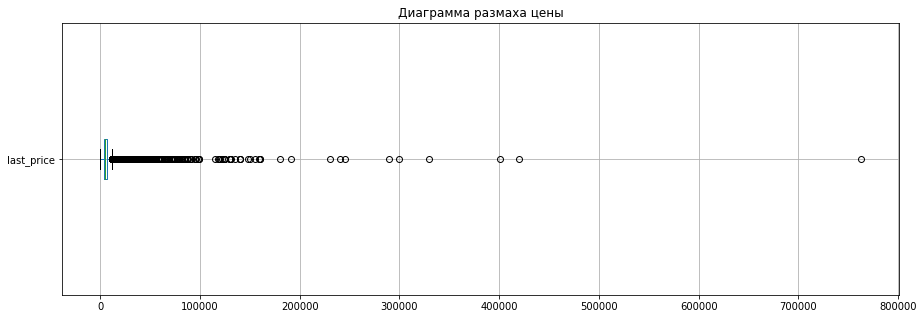

In [ ]:
# построим диаграмму размаха для всего столбца last_price
data.boxplot(column='last_price', vert = False, figsize=(15,5))
plt.title('Диаграмма размаха цены')
plt.show()

Цена свыше 100 млн рублей вполне возможна, но для нашего исследования она исказит данные. Ограничим рынок элитной недвижимости 100 млн руб.:

In [ ]:
data = data.loc[data['last_price']<=100000]

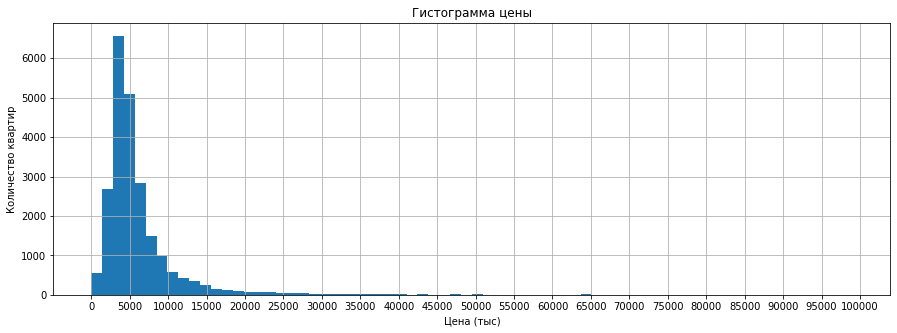

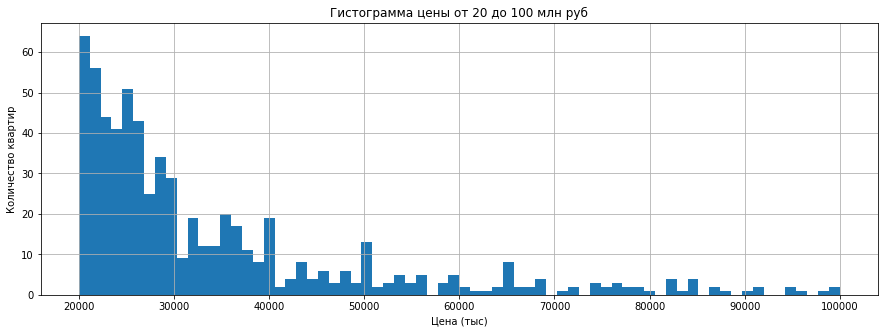

In [ ]:
# построим гистограмму для столбца last_price:
data.hist(column='last_price', bins=70, figsize=(15,5))
plt.locator_params(axis='x', nbins=40)
plt.xlabel('Цена (тыс)')
plt.ylabel('Количество квартир')
plt.title('Гистограмма цены')
plt.show
# построим гистограмму для столбца last_price для квартир от 20 до 100 млн руб:
data.hist(column='last_price', bins=70, range=(20000,100000), figsize=(15,5))
plt.title('Гистограмма цены от 20 до 100 млн руб')
plt.xlabel('Цена (тыс)')
plt.ylabel('Количество квартир')
plt.show;

Значения после 70 млн. руб. также выглядят достаточно редкими, удалим их:

In [ ]:
data = data.loc[data['last_price']<70000]

Посмотрим на распределение цен до 5 млн руб:

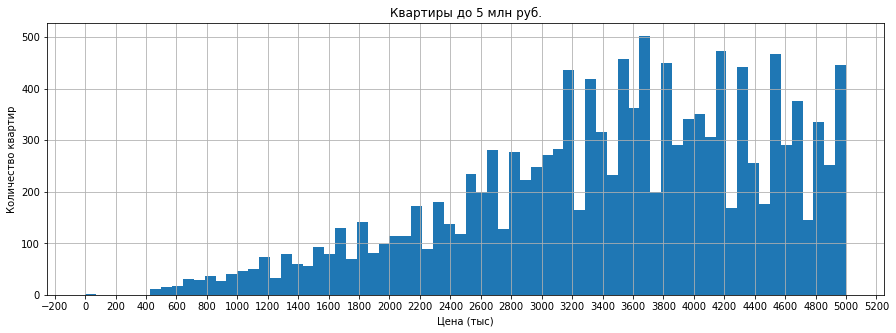

In [ ]:
data.hist(column='last_price', bins=70, range=(0,5000), figsize=(15,5))
plt.locator_params(axis='x', nbins=40)
plt.title('Квартиры до 5 млн руб.')
plt.xlabel('Цена (тыс)')
plt.ylabel('Количество квартир')
plt.show;

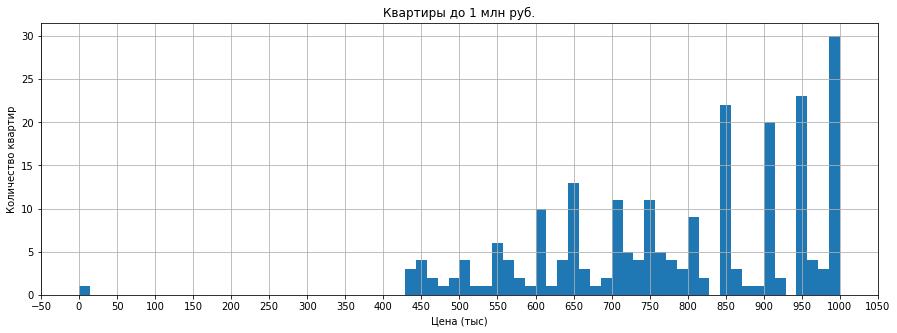

In [ ]:
data.hist(column='last_price', bins=70, range=(0,1000), figsize=(15,5))
plt.locator_params(axis='x', nbins=40)
plt.title('Квартиры до 1 млн руб.')
plt.xlabel('Цена (тыс)')
plt.ylabel('Количество квартир')
plt.show;

На графике виден явный вброс около 0, удалим квартиры до 400 тыс. руб.:

In [ ]:
data = data.loc[data['last_price'] > 400]

Построим диаграмму размаха для очищенных значений:

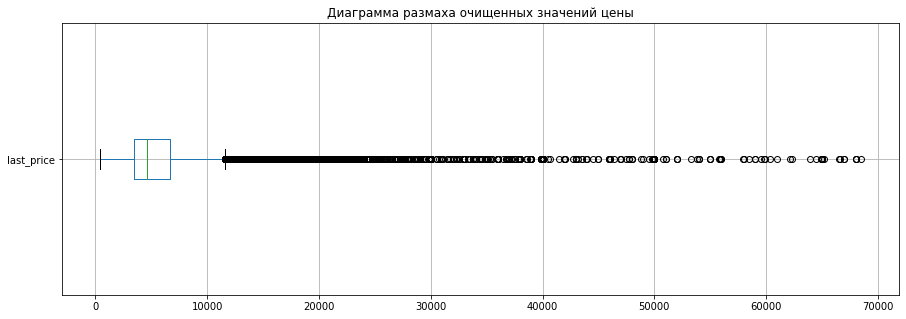

In [ ]:
data.boxplot(column='last_price', vert = False, figsize=(15,5))
plt.title('Диаграмма размаха очищенных значений цены')
plt.show()

Нормальный разброс значений заканчивается около 12 млн руб, однако, логично предположить, что элитной недвижимости меньше всего на рынке, так что для репрезентативности выборки мы оставили значения, выходящие за границы нормального разброса, но ограничили их 70 млн. руб.

**`total_area`**

In [ ]:
data['total_area'].describe()

count    22841.000000
mean        59.577462
std         32.091174
min         13.000000
25%         40.000000
50%         52.000000
75%         69.000000
max        590.000000
Name: total_area, dtype: float64

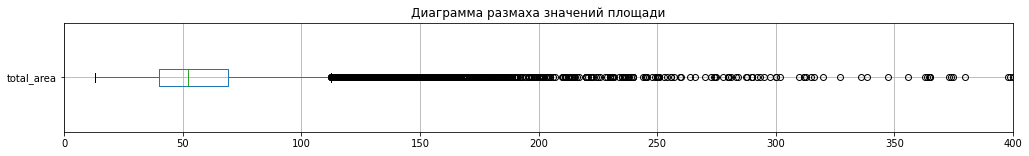

In [ ]:
# диаграмма размаха значений площади
fig, ax = plt.subplots(figsize = (17,2))
ax = data[['total_area']].boxplot(vert = False, ax =ax)
ax.set_title('Диаграмма размаха значений площади')
ax.set_xlim(0, 400);

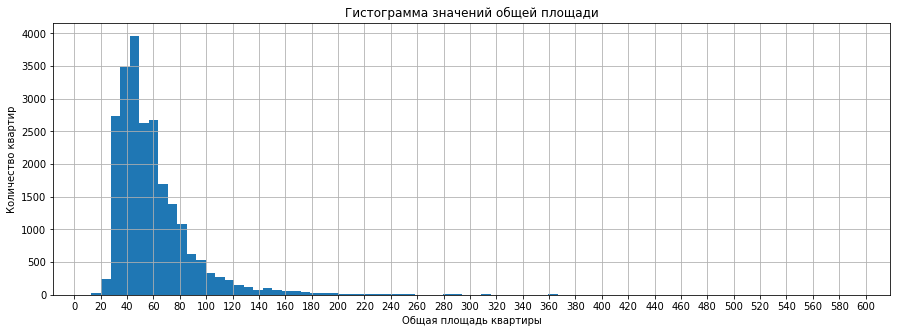

In [ ]:
# построим столбчатую диаграмму для столбца 'total_area'
data['total_area'].hist(bins=80, figsize=(15,5))
plt.locator_params(axis='x', nbins=60)
plt.title('Гистограмма значений общей площади')
plt.xlabel('Общая площадь квартиры')
plt.ylabel('Количество квартир')
plt.show()

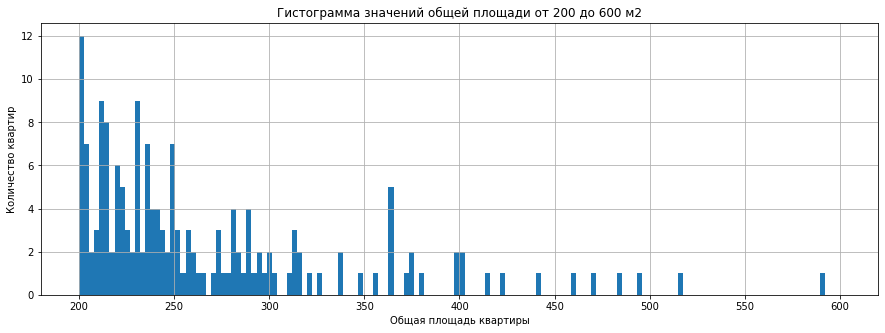

In [ ]:
data['total_area'].hist(bins=150, range=(200,600), figsize=(15,5))
plt.title('Гистограмма значений общей площади от 200 до 600 м2')
plt.xlabel('Общая площадь квартиры')
plt.ylabel('Количество квартир')
plt.show()

Квартиры больше 250 м2 являются редкими для нашего датасета, ограничим общий метраж данным значением:

In [ ]:
data = data.loc[data['total_area']<=250]

Рассмотрим квартиры с метражом до 30 м2:

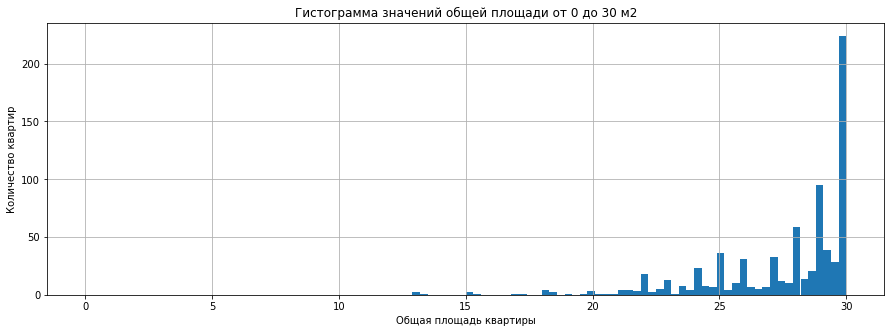

In [ ]:
data['total_area'].hist(bins=100, range=(0,30), figsize=(15,5))
plt.title('Гистограмма значений общей площади от 0 до 30 м2')
plt.xlabel('Общая площадь квартиры')
plt.ylabel('Количество квартир')
plt.show()

Значения до 20 м2 выглядят редкими, удалим строки с данными площадями:

In [ ]:
data = data.loc[data['total_area']>=20]

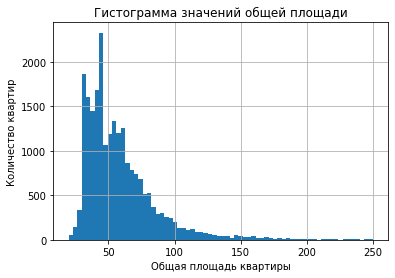

In [ ]:
# построим гистограмму для total_area с отфильтрованными данными
data['total_area'].hist(bins=70)
plt.title('Гистограмма значений общей площади')
plt.xlabel('Общая площадь квартиры')
plt.ylabel('Количество квартир')
plt.show()

**`rooms`**

In [ ]:
data['rooms'].describe()

count    22755.000000
mean         2.049747
std          1.017939
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         14.000000
Name: rooms, dtype: float64

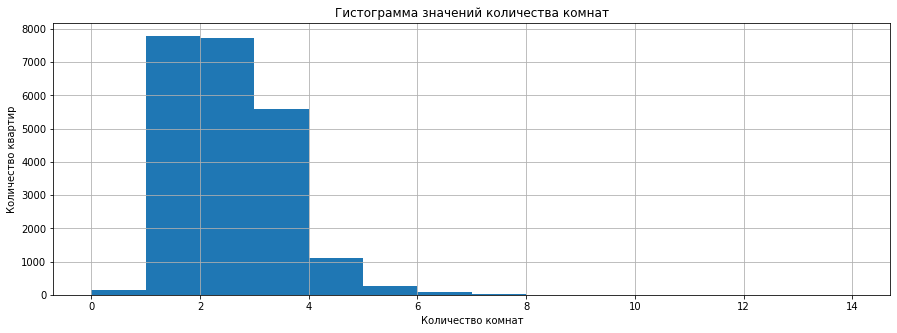

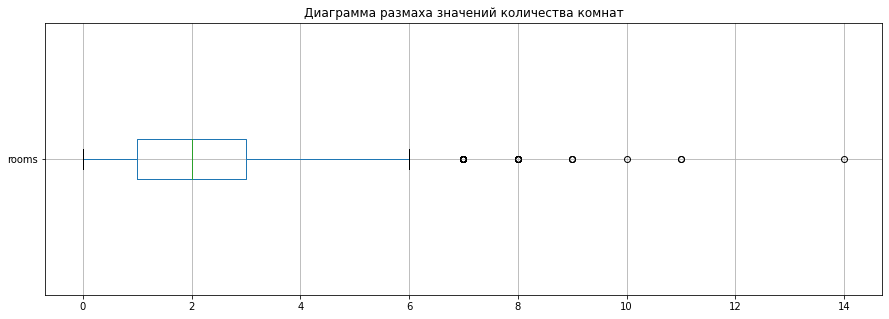

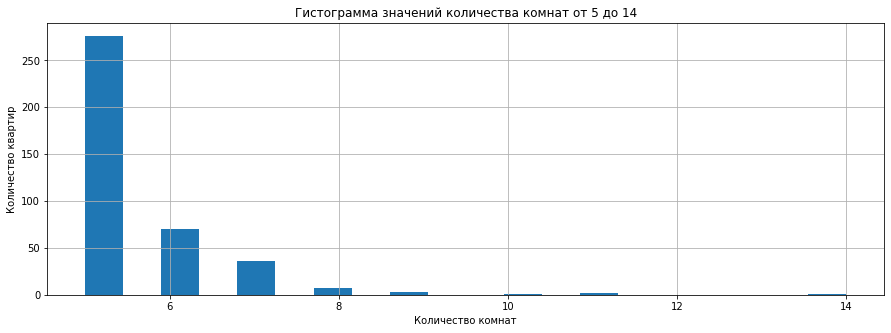

In [ ]:
# построим гистограмму для rooms
data['rooms'].hist(bins= 14, figsize=(15,5))
plt.title('Гистограмма значений количества комнат')
plt.xlabel('Количество комнат')
plt.ylabel('Количество квартир')
plt.show()
# построим диаграмму размаха для rooms
data.boxplot(column='rooms', vert = False, figsize=(15,5))
plt.title('Диаграмма размаха значений количества комнат')
plt.show()
# построим гистограмму для rooms от 5 до 14
data['rooms'].hist(bins= 20, range=(5,14), figsize=(15,5))
plt.title('Гистограмма значений количества комнат от 5 до 14')
plt.xlabel('Количество комнат')
plt.ylabel('Количество квартир')
plt.show()

Разброс нормальных значений количества комнат заканчивается на отметке в 6, при этом на гистограмме видно, что есть еще некоторое количество квартир с 7 и 8 комнатами. Большее количество комнат - редкость, отфильтруем датасет:

In [ ]:
data = data.loc[data['rooms']<=8]

Проверим данные на наличие логических ошибок:

In [ ]:
# отфильтруем датасет согласно условию: количество комнат в квартире равно 0 и эта квартира не является студией
display(data.query("rooms == 0 and studio == False").shape)

(42, 22)

В 42 объявлениях квартира не обозначена как студия, но при этом имеет 0 комнат. Возможно, это возникает из-за отсутствия автоматического проставления параметра 'True' в столбце студия, если человек выбирает количество комнат равное 0. Можно включить данную недоработку в баг-репорт.

In [ ]:
# отфильтруем датасет согласно условию: количество комнат в квартире больше 0 и эта квартира является студией
display(data.query("rooms > 0 and studio == True"))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
2389,5,2250.0,25.4,2016-06-07,1,2.65,12,17.1,8,False,...,4.4,2,санкт-петербург,14125.0,12921.0,2,328.0,2,485.0,26
3187,13,3800.0,27.0,2016-05-17,1,2.65,14,18.0,8,False,...,4.7,2,санкт-петербург,50348.0,16053.0,0,-1.0,0,-1.0,45
4180,4,4500.0,34.0,2016-04-25,1,2.80,10,21.0,10,False,...,5.9,2,санкт-петербург,23609.0,5299.0,0,-1.0,1,433.0,62
11026,1,2800.0,28.0,2016-05-04,1,2.65,26,19.0,6,False,...,4.8,2,поселок парголово,53511.0,19687.0,0,-1.0,0,-1.0,45
12935,10,2200.0,31.0,2016-05-15,1,2.50,8,22.3,5,False,...,5.3,1,никольское,-1.0,-1.0,-1,-1.0,-1,-1.0,44
18732,4,2400.0,22.0,2016-05-06,1,2.65,10,15.0,6,False,...,3.8,0,поселок кудрово,-1.0,-1.0,-1,-1.0,-1,-1.0,45
20086,0,1550.0,22.0,2016-05-11,1,2.70,15,10.9,14,False,...,3.8,2,никольское,-1.0,-1.0,-1,-1.0,-1,-1.0,45
21702,9,2349.0,23.4,2016-05-19,1,2.70,20,16.0,8,False,...,4.0,1,поселок новое девяткино,-1.0,-1.0,-1,-1.0,-1,-1.0,34
22652,5,2650.0,26.0,2015-06-24,1,2.65,14,15.0,11,False,...,4.5,0,мурино,-1.0,-1.0,-1,-1.0,-1,-1.0,373


Квартир с параметром studio = True и количеством комнат больше 0 всего 9, и все они однокомнатные. Скорее всего это студии, а при подаче объвления была сделана ошибка, что еще раз подтверждает рассмотреть необходимость автоматизации проставления одного из двух параметров. Заменим значения количества комнат для этих квартир на 0:

In [ ]:
data.loc[(data['rooms'] > 0) & (data['studio'] == True), 'rooms'] = 0

# проверим правильность примененного фильтра
display(data.query("rooms > 0 and studio == True").shape)

(0, 22)

**`ceiling_height`**

count    22748.000000
mean         2.713954
std          0.735965
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max         32.000000
Name: ceiling_height, dtype: float64

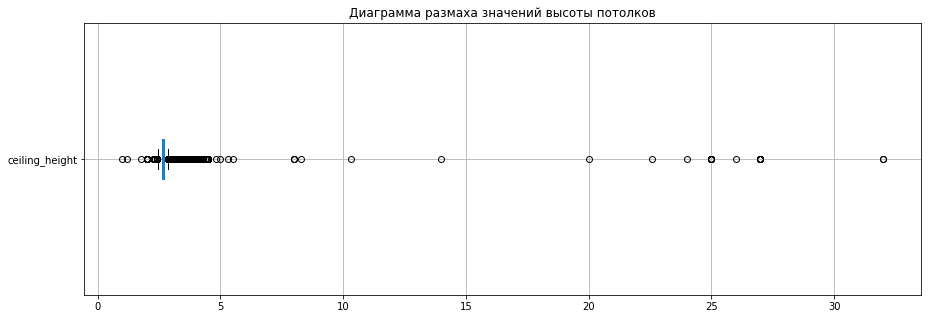

In [ ]:
display(data['ceiling_height'].describe())
data.boxplot(column='ceiling_height', vert=False, figsize=(15,5))
plt.title('Диаграмма размаха значений высоты потолков')
plt.show()

Логично предположить, что если высота указана больше 20 м., то это на самом деле это вещественные значения. Преобразуем их:

In [ ]:
data.loc[data['ceiling_height'] >= 20, 'ceiling_height'] /= 10

Построим гистограмму для значений высоты потолков:

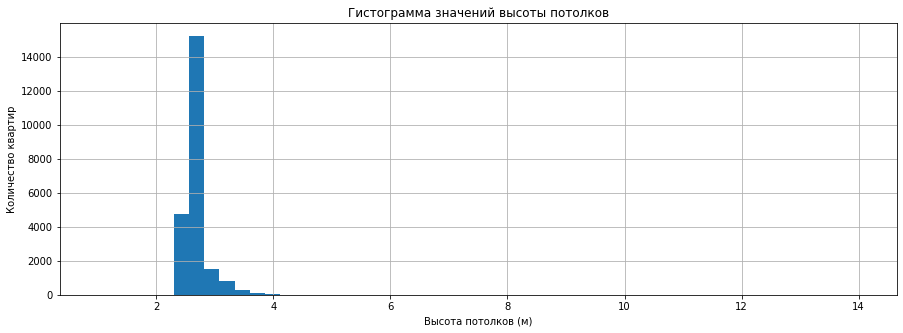

In [ ]:
data.hist(column='ceiling_height', bins=50, figsize=(15,5))
plt.title('Гистограмма значений высоты потолков')
plt.xlabel('Высота потолков (м)')
plt.ylabel('Количество квартир')
plt.show()

И на гистограмме, и на диаграмме видно, что квартиры с потолками более 4 м. являются редкими. Удалим строки с аномально высокими потолками:

In [ ]:
data = data.loc[data['ceiling_height'] < 4]

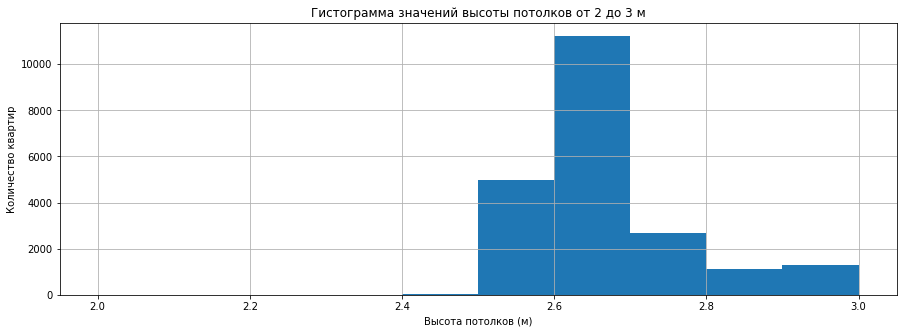

In [ ]:
data.hist(column='ceiling_height', range=(2,3), figsize=(15,5))
plt.title('Гистограмма значений высоты потолков от 2 до 3 м')
plt.xlabel('Высота потолков (м)')
plt.ylabel('Количество квартир')
plt.show()

Согласно СНИП 31-01-2003 минимальная высота жилых комнат - 2.5 м. На гистограмме также видно, что высота потолка до 2.5 м - редкость. Отфильтруем данные:

In [ ]:
data = data.loc[data['ceiling_height'] >= 2.5]
display(data['ceiling_height'].describe())

count    22608.000000
mean         2.688528
std          0.192217
min          2.500000
25%          2.600000
50%          2.650000
75%          2.700000
max          3.980000
Name: ceiling_height, dtype: float64

**`floors_total`**

Как мы отмечали раньше, самое высокое жилое здание в Санкт-петербурге и соседних населенных пунктах имеет 37 этажей. Посмотрим, сколько в датасете домов имеет бОльшую этажность:

In [ ]:
display(data[data['floors_total'] > 37])
# удалим строчки с бОльшей этажностью
data = data.loc[data['floors_total'] < 37]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
2253,12,3800.0,45.5,2018-06-28,2,2.88,60,27.4,4,False,...,7.4,0,кронштадт,67763.0,49488.0,2,342.0,3,614.0,166
16731,9,3978.0,40.0,2018-09-24,1,2.65,52,10.5,18,False,...,14.0,0,санкт-петербург,20728.0,12978.0,1,793.0,0,-1.0,45


**`living_area`**, **`kitchen_area`**

In [ ]:
params = data[['living_area', 'kitchen_area']]
params.describe()

,living_area,kitchen_area
count,22606.000000,22606.000000
mean,33.334699,10.218995
std,17.960494,5.090157
min,2.000000,1.300000
25%,18.900000,7.000000
50%,30.000000,9.000000
75%,41.900000,11.700000
max,184.000000,75.000000


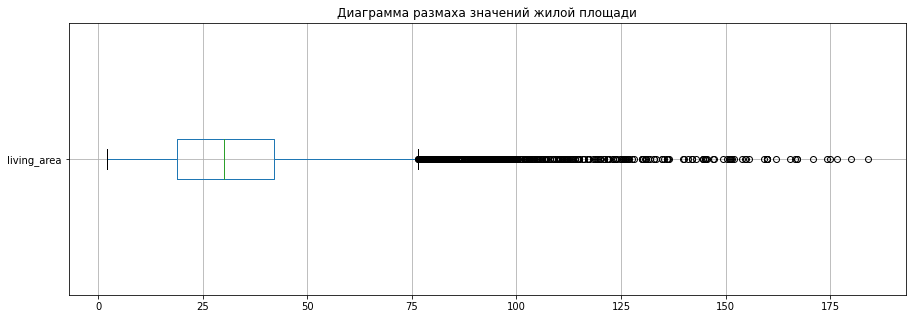

In [ ]:
data.boxplot(column='living_area', vert=False, figsize=(15,5))
plt.title('Диаграмма размаха значений жилой площади')
plt.show()

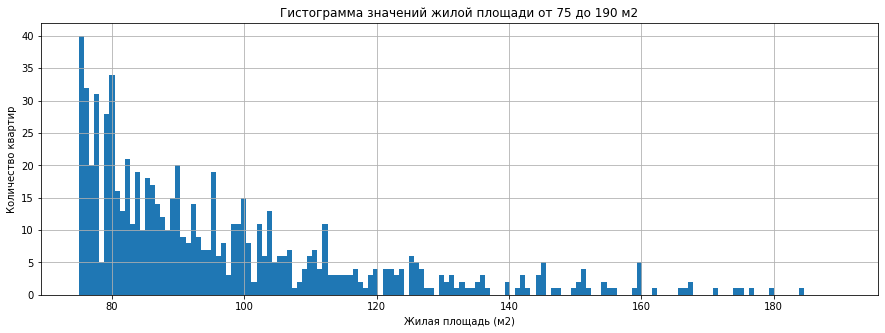

In [ ]:
data.hist(column='living_area', range=(75,190), bins = 150, figsize=(15,5))
plt.title('Гистограмма значений жилой площади от 75 до 190 м2')
plt.xlabel('Жилая площадь (м2)')
plt.ylabel('Количество квартир')
plt.show()

Ограничив ранее общую площадь условием total_area >= 250 м2, мы убрали и определенную долю данных с большой жилой площадью. Теперь максимальная жилая площадь составляет 184 м2, а не 409 м2, как это было до начала фильрации. Как видно на диаграмме и гистограмме, явно редкие значения теперь располагаются за отметкой 160 м2. Избавимся от них:

In [ ]:
data = data.loc[data['living_area']<=160]

Посмотрим на высокие значения в столбце kitchen_area:

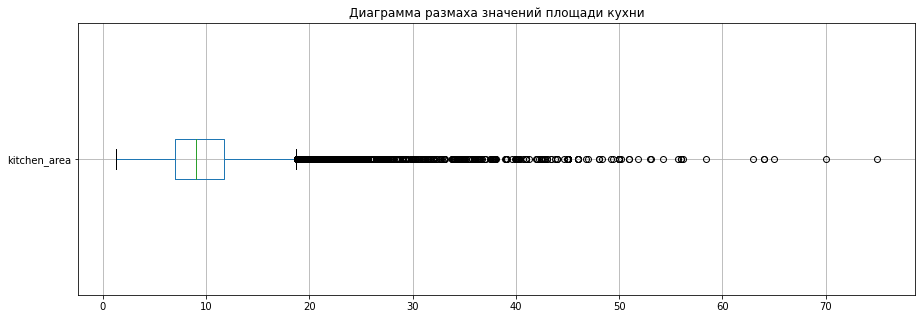

In [ ]:
data.boxplot(column='kitchen_area', vert=False, figsize=(15,5))
plt.title('Диаграмма размаха значений площади кухни')
plt.show()

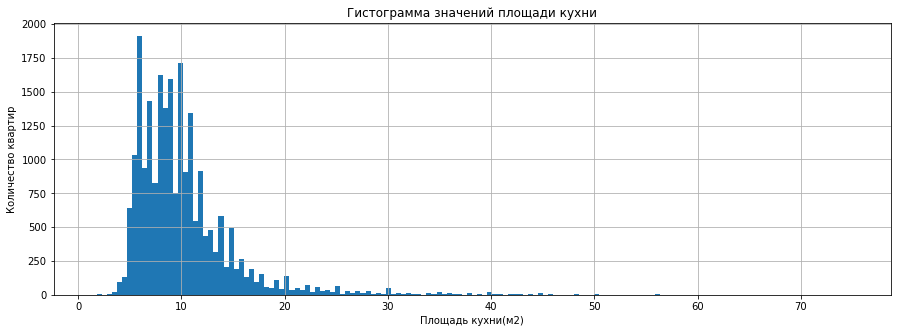

In [ ]:
data.hist(column='kitchen_area', bins = 150, figsize=(15,5))
plt.title('Гистограмма значений площади кухни')
plt.xlabel('Площадь кухни(м2)')
plt.ylabel('Количество квартир')
plt.show()

Аналогично с living_area большую часть редких высоких значений kitchen_area мы убрали, отфильтровав данные общей площади. Уберем редкие значения, ограничив максимальную площадь кухни 50 м2:

In [ ]:
data = data.loc[data['kitchen_area']<=50]

СНИП 31-01-2003 предъявлет следующие требования к площади помещений в квартире: минимальный размер жилой площади - 14 м2, минимальный размер кухни - 5 м2. Учитывая, что не все помещения соответсвуют нормативам, многие подвергались перепланировке, а также тот факт, что в законе нет определения квартиры-студии, попробуем исключить максимально аномальные значения в площади квартир:

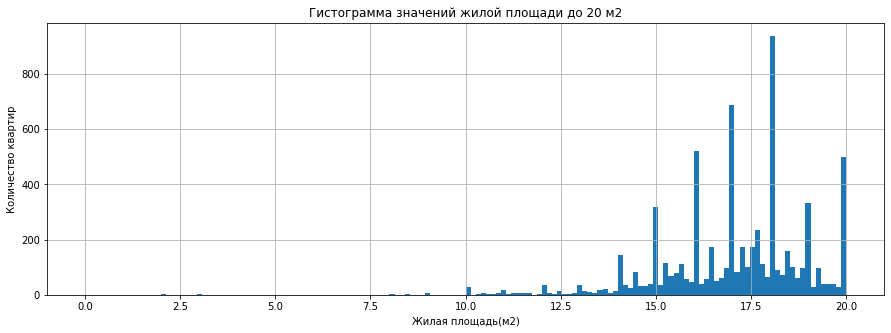

In [ ]:
# построим гистограмму распределения квартир с жилой площадью до 20 м2
data.hist(column='living_area', range=(0,20), bins=150, figsize=(15,5))
plt.title('Гистограмма значений жилой площади до 20 м2')
plt.xlabel('Жилая площадь(м2)')
plt.ylabel('Количество квартир')
plt.show()

Квартиры с жилой площадью до 10 м2 выглядят как явные вбросы, удалим их:

In [ ]:
data = data.loc[data['living_area']>=10]

0.0129910437173007

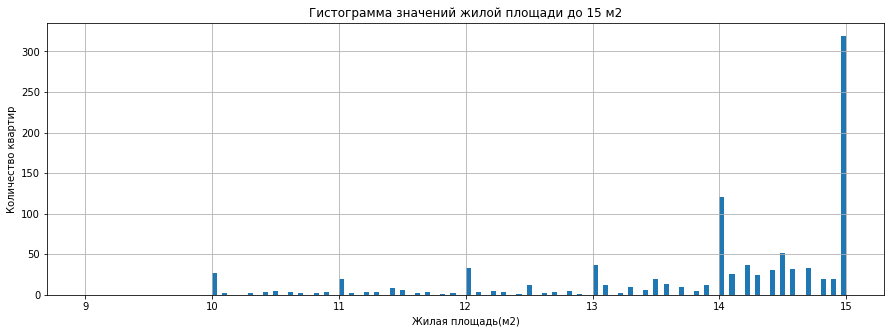

In [ ]:
# вычислим долю объявлений с жилой площадью меньше 14 м2
display(len(data.query('living_area < 14'))/len(data))

# построим гистограмму для значений меньше 15 м2
data.hist(column='living_area', range=(9,15), bins=150, figsize=(15,5))
plt.title('Гистограмма значений жилой площади до 15 м2')
plt.xlabel('Жилая площадь(м2)')
plt.ylabel('Количество квартир')
plt.show()

Доля квартир с жилой площадью до 14 м2 составляет около 1%. Данные квартиры входят в нормальный разброс и не выглядят редкими. Оставим их как есть.

Рассмотрим квартиры с небольшими площадями кухни:

count    22554.000000
mean        10.165660
std          4.877328
min          1.300000
25%          7.000000
50%          9.000000
75%         11.700000
max         50.000000
Name: kitchen_area, dtype: float64

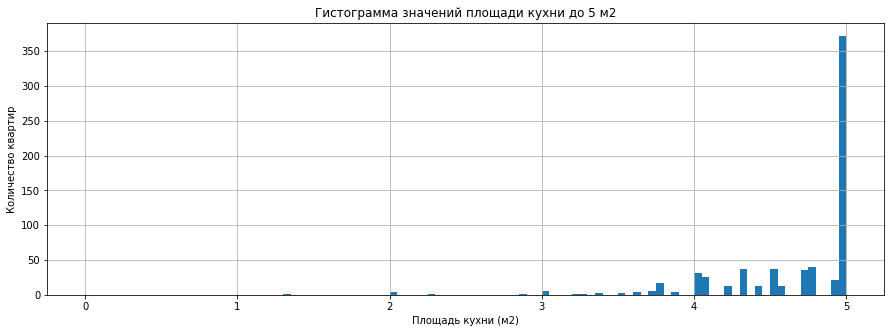

In [ ]:
display(data['kitchen_area'].describe())

# построим гистограмму для объявлений, где площадь кухни <= 5 м2
data.hist(column='kitchen_area', range=(0,5), bins=100, figsize=(15,5))
plt.title('Гистограмма значений площади кухни до 5 м2')
plt.xlabel('Площадь кухни (м2)')
plt.ylabel('Количество квартир')
plt.show()

In [ ]:
# вычислим долю квартир с кухней меньше 4 м2
display(len(data.query('kitchen_area < 4'))/len(data))

0.002261239691407289

Есть незначительнаяя  доля квартир с площадью кухни меньше 4 м2. Эти данные вероятнее содержат ошибки, чем отражают реальность. Удалим строчки с такими значениями:

In [ ]:
data = data.query('kitchen_area >= 4')

**`parks_nearest`**, **`parks_around_3000`**, **`ponds_nearest`**, **`ponds_around_3000`**, **`airports_nearest`**

In [ ]:
# Данные в этих столбцах заполгнялись автоматически, роверим их на наличие явных логических ошибок:
display(data.query('parks_nearest > 3000 and parks_around_3000 != 0')['parks_around_3000'].count())
display(data.query('ponds_nearest > 3000 and ponds_around_3000 != 0')['ponds_around_3000'].count())
display(data.query('parks_nearest == 0')['parks_nearest'].count())
display(data.query('ponds_nearest == 0')['ponds_nearest'].count())
display(data.query('airports_nearest == 0')['airports_nearest'].count())
# удалим строчку с квартирой, расположенной в аэропорту:
data = data.query('airports_nearest != 0')

0

0

0

0

1

**`days_exposition`**

In [ ]:
data['days_exposition'].describe()

count    22502.000000
mean       156.068172
std        213.134037
min         -1.000000
25%         23.000000
50%         73.000000
75%        198.000000
max       1580.000000
Name: days_exposition, dtype: float64

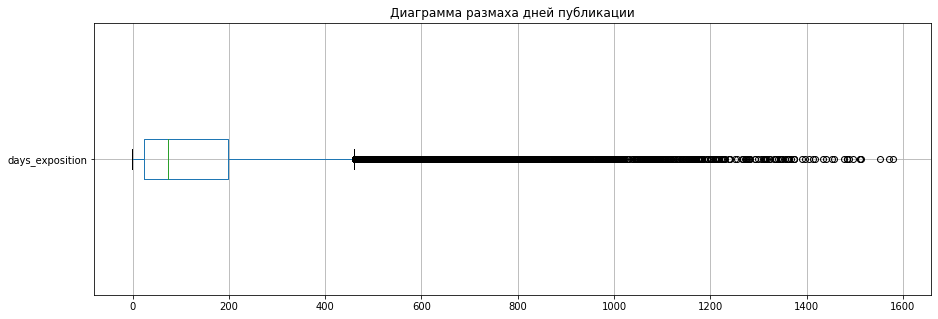

In [ ]:
# диаграмма размаха для days_exposition
data.boxplot(column='days_exposition', vert=False, figsize=(15,5))
plt.title('Диаграмма размаха дней публикации')
plt.show()

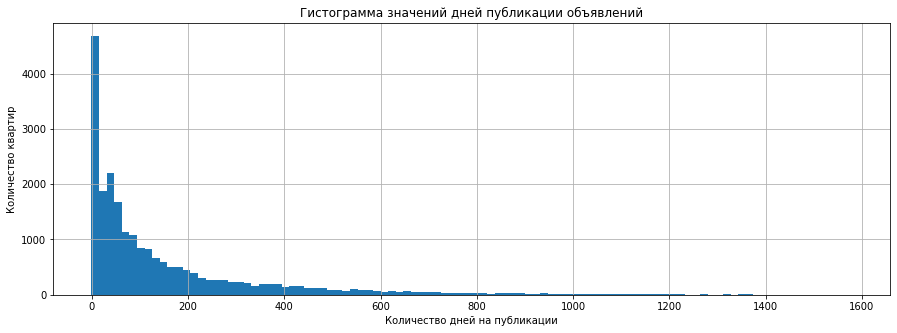

In [ ]:
data.hist(column='days_exposition', bins=100, figsize=(15,5))
plt.title('Гистограмма значений дней публикации объявлений')
plt.xlabel('Количество дней на публикации')
plt.ylabel('Количество квартир')
plt.show()

На гистограмме и диаграмме видно, что большинство объявлений было на публикации до 500 дней, после 1200 дней - явные аномалии, удалим их:

In [ ]:
data = data.query('days_exposition <= 1200')

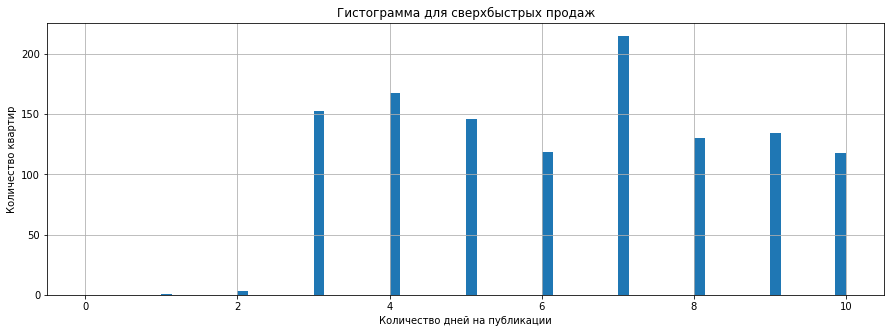

In [ ]:
# построим гистограмму для сверхбыстрых продаж
data.hist(column='days_exposition', bins=70, range=(0,10), figsize=(15,5))
plt.title('Гистограмма для сверхбыстрых продаж')
plt.xlabel('Количество дней на публикации')
plt.ylabel('Количество квартир')
plt.show()

Сделки до 3 дней - редкость, отфильтруем их (учитывая, что мы заменили пропуски в столбце на -1):

In [ ]:
values_to_exclude = [0, 1, 2]
data = data[~data['days_exposition'].isin(values_to_exclude)]

***Проведем проверку потери данных на этапе предобработки:***

In [ ]:
data_losses = ((23699 - len(data)) / 23699) * 100
display(f'Уровень потерь данных на этапе предобработки составляет {data_losses:.1f}%')

'Уровень потерь данных на этапе предобработки составляет 5.4%'

#### check gap

In [ ]:
# check
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22412 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          22412 non-null  int64         
 1   last_price            22412 non-null  float64       
 2   total_area            22412 non-null  float64       
 3   first_day_exposition  22412 non-null  datetime64[ns]
 4   rooms                 22412 non-null  int64         
 5   ceiling_height        22412 non-null  float64       
 6   floors_total          22412 non-null  int64         
 7   living_area           22412 non-null  float64       
 8   floor                 22412 non-null  int64         
 9   is_apartment          22412 non-null  bool          
 10  studio                22412 non-null  bool          
 11  open_plan             22412 non-null  bool          
 12  kitchen_area          22412 non-null  float64       
 13  balcony         

In [ ]:
(
            data[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  'kitchen_area',
                  'floor', 'floors_total']]
            .apply (['count', 'min', 'max', 'median'])
            .style.format("{:,.2f}")
        )

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
count,"22,412.00","22,412.00","22,412.00","22,412.00","22,412.00","22,412.00","22,412.00","22,412.00","22,412.00"
min,0.00,21.10,2.50,-1.00,430.00,10.00,4.00,1.00,1.00
max,8.00,250.00,3.98,"1,200.00","68,500.00",160.00,50.00,33.00,36.00
median,2.00,52.00,2.65,73.00,"4,600.00",30.00,9.00,4.00,9.00


### Посчитаем и добавим в таблицу новые столбцы

**`цена одного квадратного метра`**

In [ ]:
data['price_of_sqm'] = data['last_price'] / data['total_area']
display(data.head(3))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_of_sqm
0,20,13000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,0,санкт-петербург,18863.0,16028.0,1,482.0,2,755.0,-1,120.370370
1,7,3350.0,40.4,2018-12-04,1,2.65,11,18.6,1,False,...,2,поселок шушары,12817.0,18603.0,0,-1.0,0,-1.0,81,82.920792
2,10,5196.0,56.0,2015-08-20,2,2.65,5,34.3,4,False,...,0,санкт-петербург,21741.0,13933.0,1,90.0,2,574.0,558,92.785714


**`день недели, месяц, год публикации объявления`**

In [ ]:
data['weekday_exposition'] = data['first_day_exposition'].dt.weekday # день недели публикации
data['month_exposition'] = data['first_day_exposition'].dt.month # месяц публикации
data['year_exposition'] = data['first_day_exposition'].dt.year # год публикации
display(data.head(3))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_of_sqm,weekday_exposition,month_exposition,year_exposition
0,20,13000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,16028.0,1,482.0,2,755.0,-1,120.370370,3,3,2019
1,7,3350.0,40.4,2018-12-04,1,2.65,11,18.6,1,False,...,18603.0,0,-1.0,0,-1.0,81,82.920792,1,12,2018
2,10,5196.0,56.0,2015-08-20,2,2.65,5,34.3,4,False,...,13933.0,1,90.0,2,574.0,558,92.785714,3,8,2015


**`тип этажа квартиры`**

In [ ]:
# напишем функцию для категоризации этажей на "первый", "последний" и "другой":
def type_of_floor(row):
    floor = row['floor']
    if floor == 1:
        return 'первый'
    elif floor == row['floors_total']:
        return 'последний'
    else:
        return 'другой'

data['floor_type'] = data.apply(type_of_floor, axis=1)
display(data.head(4))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_of_sqm,weekday_exposition,month_exposition,year_exposition,floor_type
0,20,13000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,1,482.0,2,755.0,-1,120.370370,3,3,2019,другой
1,7,3350.0,40.4,2018-12-04,1,2.65,11,18.6,1,False,...,0,-1.0,0,-1.0,81,82.920792,1,12,2018,первый
2,10,5196.0,56.0,2015-08-20,2,2.65,5,34.3,4,False,...,1,90.0,2,574.0,558,92.785714,3,8,2015,другой
3,0,64900.0,159.0,2015-07-24,3,2.65,14,90.3,9,False,...,2,84.0,3,234.0,424,408.176101,4,7,2015,другой


**`расстояние до центра в километрах`**

In [ ]:
data['distance_to_center'] = data['city_centers_nearest'] / 1000
data['distance_to_center'] = data['distance_to_center'].replace(-0.001, -1)
data['distance_to_center'] = data['distance_to_center'].round().astype(int)
display(data.head(10))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_of_sqm,weekday_exposition,month_exposition,year_exposition,floor_type,distance_to_center
0,20,13000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,482.0,2,755.0,-1,120.370370,3,3,2019,другой,16
1,7,3350.0,40.4,2018-12-04,1,2.65,11,18.6,1,False,...,-1.0,0,-1.0,81,82.920792,1,12,2018,первый,19
2,10,5196.0,56.0,2015-08-20,2,2.65,5,34.3,4,False,...,90.0,2,574.0,558,92.785714,3,8,2015,другой,14
3,0,64900.0,159.0,2015-07-24,3,2.65,14,90.3,9,False,...,84.0,3,234.0,424,408.176101,4,7,2015,другой,7
4,2,10000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,112.0,1,48.0,121,100.000000,1,6,2018,другой,8
5,10,2890.0,30.4,2018-09-10,1,2.65,12,14.4,5,False,...,-1.0,-1,-1.0,55,95.065789,0,9,2018,другой,-1
6,6,3700.0,37.3,2017-11-02,1,2.65,26,10.6,6,False,...,-1.0,0,-1.0,155,99.195710,3,11,2017,другой,19
7,5,7915.0,71.6,2019-04-18,2,2.65,24,40.7,22,False,...,-1.0,0,-1.0,-1,110.544693,3,4,2019,другой,12
8,20,2900.0,33.2,2018-05-23,1,2.65,27,15.4,26,False,...,-1.0,-1,-1.0,189,87.349398,2,5,2018,другой,-1
9,18,5400.0,61.0,2017-02-26,3,2.50,9,43.6,7,False,...,-1.0,0,-1.0,289,88.524590,6,2,2017,другой,15


### Исследовательский анализ данных

Изучим следующие параметры объектов:
* общая площадь;
* жилая площадь;
* площадь кухни;
* цена объекта;
* количество комнат;
* высота потолков;
* этаж квартиры;
* тип этажа квартиры («первый», «последний», «другой»);
* общее количество этажей в доме;
* расстояние до центра города в метрах;
* расстояние до ближайшего аэропорта;
* расстояние до ближайшего парка;
* день и месяц публикации объявления.

#### Общая площадь, жилая площадь, площадь кухни

In [ ]:
# выведем общую информацию параметров площади
data[['total_area', 'living_area', 'kitchen_area']].describe()

,total_area,living_area,kitchen_area
count,22412.000000,22412.000000,22412.000000
mean,58.491594,33.258991,10.170556
std,27.333241,17.613248,4.860625
min,21.100000,10.000000,4.000000
25%,40.000000,18.900000,7.000000
50%,52.000000,30.000000,9.000000
75%,68.800000,41.900000,11.700000
max,250.000000,160.000000,50.000000


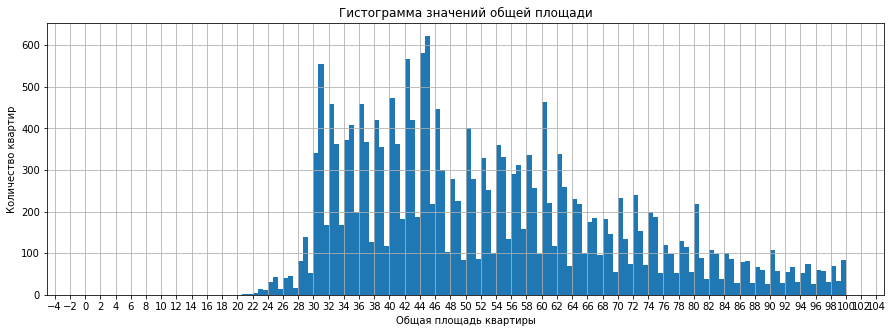

In [ ]:
# построим гистограмму для total_area
data.hist(column='total_area', bins=150, range=(0,100), figsize=(15,5))
plt.locator_params(axis='x', nbins=60)
plt.title('Гистограмма значений общей площади')
plt.xlabel('Общая площадь квартиры')
plt.ylabel('Количество квартир')
plt.show()

Наибольшую долю рынка составляют квартиры с общей площадью 30-46 м2.

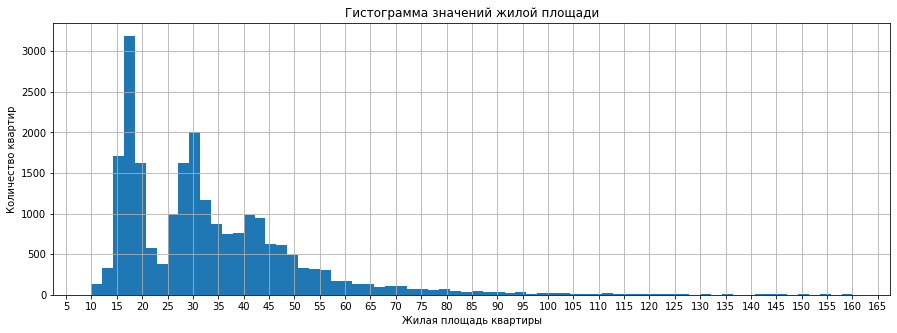

In [ ]:
# построим гистограмму для living_area
data.hist(column='living_area', bins=70, figsize=(15,5))
plt.locator_params(axis='x', nbins=50)
plt.title('Гистограмма значений жилой площади')
plt.xlabel('Жилая площадь квартиры')
plt.ylabel('Количество квартир')
plt.show()

Жилая площадь квартир распределена неравномерно. Есть 2 пика - первый между 15 и 20 м2, второй - около 30 м2.

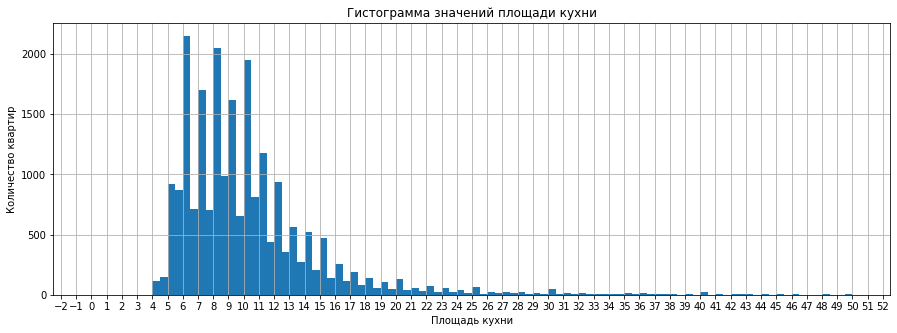

In [ ]:
# построим гистограмму для kitchen_area
data.hist(column='kitchen_area', bins=100, range=(0, 50), figsize=(15,5))
plt.locator_params(axis='x', nbins=70)
plt.title('Гистограмма значений площади кухни')
plt.xlabel('Площадь кухни')
plt.ylabel('Количество квартир')
plt.show()

Большинство квартир имеет кухни 6-11 м2.

#### Цена объекта

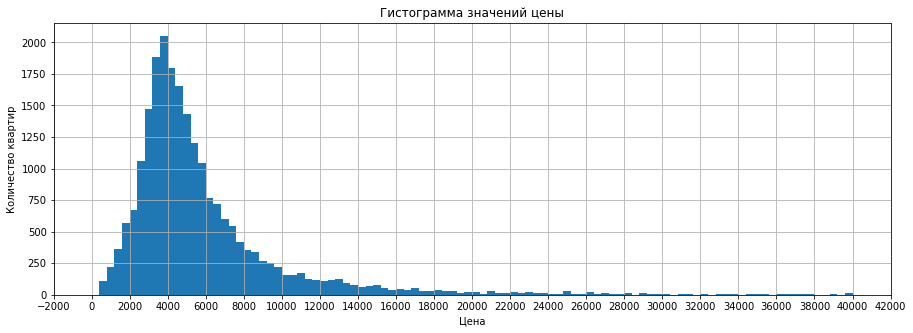

In [ ]:
# построим гистограмму для объявлений с ценой до 40 млн. руб
data.hist(column='last_price', bins=100,range=(0,40000), figsize=(15,5))
plt.locator_params(axis='x', nbins=30)
plt.title('Гистограмма значений цены')
plt.xlabel('Цена')
plt.ylabel('Количество квартир')
plt.show()

Самая большая доля квартир на рынке недвижимости Санкт-Петербурга имеет цену 3-5 млн. руб, пик значений находится в районе 3,5 - 4 млн. руб.

#### Количество комнат

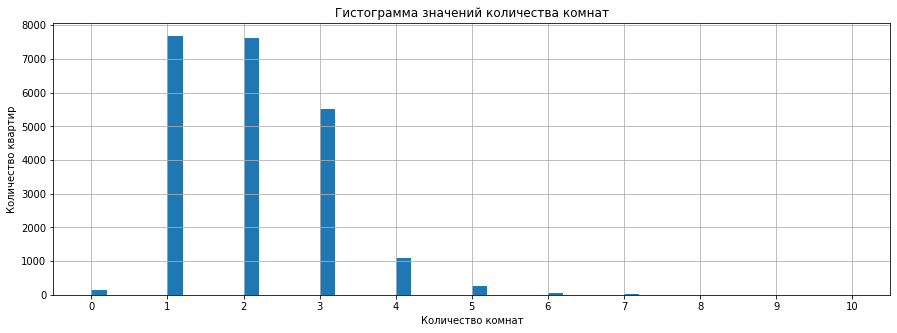

In [ ]:
# построим гистограмму для парметра "rooms"
data.hist(column='rooms', range =(0,10), bins=50, figsize=(15,5))
plt.locator_params(axis='x', nbins=20)
plt.title('Гистограмма значений количества комнат')
plt.xlabel('Количество комнат')
plt.ylabel('Количество квартир')
plt.show()

Подавляющее большинство квартир имеет от 1-3 комнаты. Небольшое количество квартир с 0 комнат - студии.

#### Высота потолков

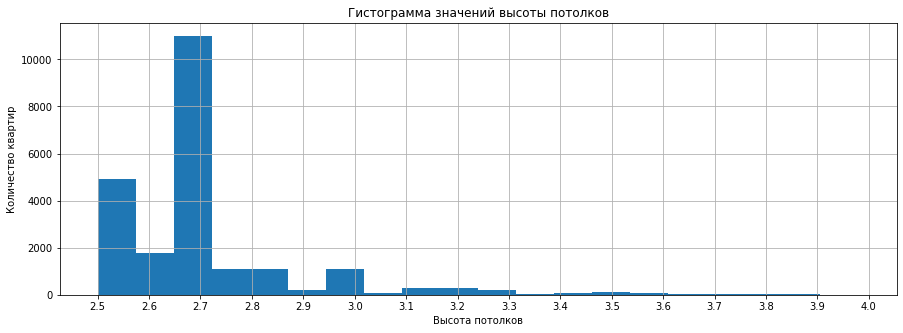

In [ ]:
# построим гистограмму для ceiling_height:
data.hist(column='ceiling_height', bins=20, figsize=(15,5))
plt.locator_params(axis='x', nbins=30)
plt.title('Гистограмма значений высоты потолков')
plt.xlabel('Высота потолков')
plt.ylabel('Количество квартир')
plt.show()

У большей части квартир высота потолков составляет 2.5-2.7 м.

#### Этаж квартиры, тип этажа квартиры, общее количество этажей

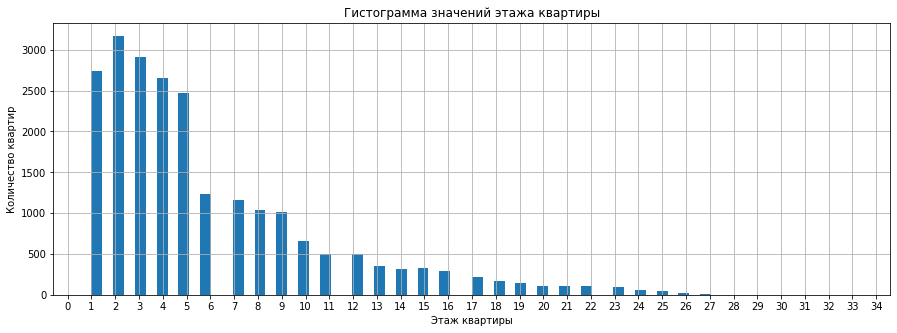

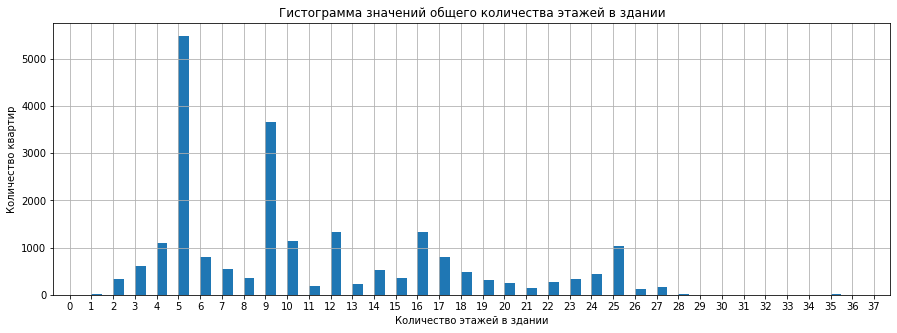

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_of_sqm,weekday_exposition,month_exposition,year_exposition,distance_to_center
floor_type,,,,,,,,,,,,,,,,,,,,,
другой,16578,16578,16578,16578,16578,16578,16578,16578,16578,16578,...,16578,16578,16578,16578,16578,16578,16578,16578,16578,16578
первый,2743,2743,2743,2743,2743,2743,2743,2743,2743,2743,...,2743,2743,2743,2743,2743,2743,2743,2743,2743,2743
последний,3091,3091,3091,3091,3091,3091,3091,3091,3091,3091,...,3091,3091,3091,3091,3091,3091,3091,3091,3091,3091


In [ ]:
# Построим гистограммы для floor и total_floors:
data.hist(column='floor', bins=70, figsize=(15,5))
plt.locator_params(axis='x', nbins=70)
plt.title('Гистограмма значений этажа квартиры')
plt.xlabel('Этаж квартиры')
plt.ylabel('Количество квартир')
plt.show()

data.hist(column='floors_total', bins=70, figsize=(15,5))
plt.locator_params(axis='x', nbins=70)
plt.title('Гистограмма значений общего количества этажей в здании')
plt.xlabel('Количество этажей в здании')
plt.ylabel('Количество квартир')
plt.show()

# Сгруппируем объявления по типу этажа квартиры и посчитаем количество квартир, входящих в эти группы:
display(data.groupby('floor_type').count())

* Большинство квартир расположены на 2-3 этажах, примерно равные доли у квартир расположенных на 1, 4 и 5 этажах.
* Выделяются большие доли квартир расположенных в 5-ти и 9-ти этажных зданиях.
* Исходя из типизации, количество квартир, расположенных на последнем и первом этажах, примерно равное.

#### Расстояние до центра города в метрах, расстояние до ближайшего аэропорта, расстояние до ближайшего парка

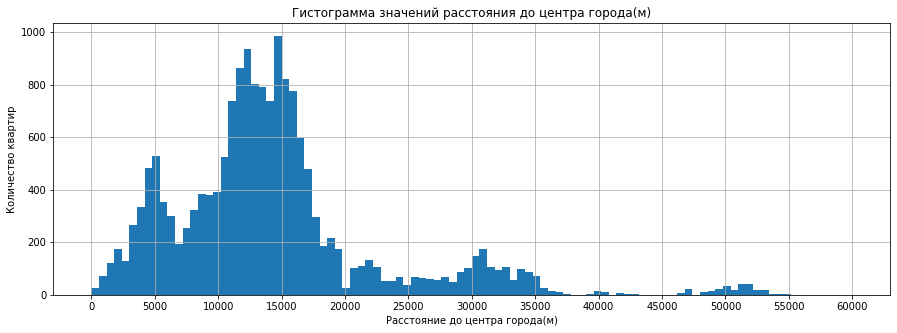

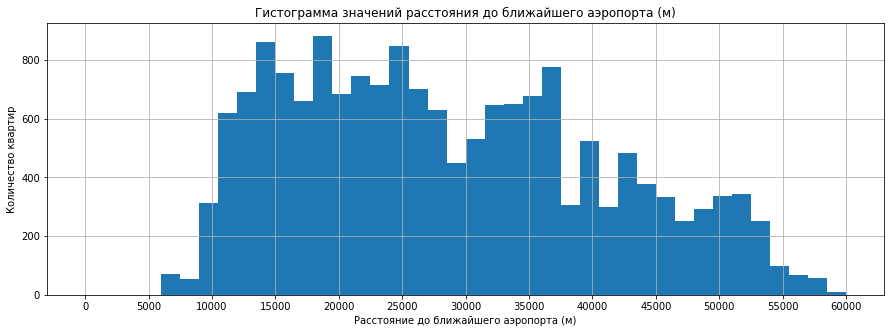

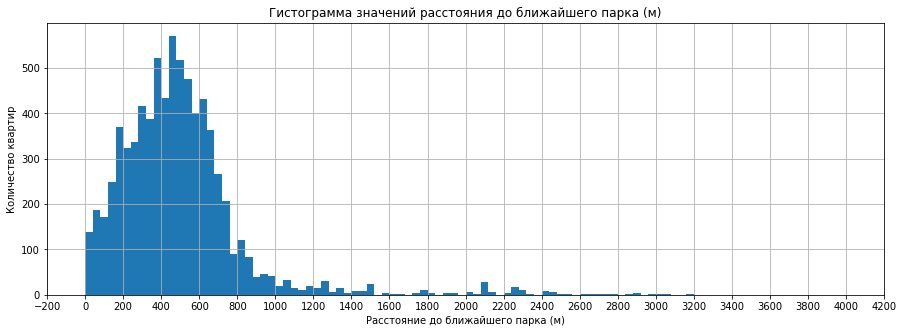

In [ ]:
# Построим гистограммы для city_centers_nearest, airports_nearest, parks_nearest:
data.hist(column='city_centers_nearest', bins=100, range=(0,60000), figsize=(15,5))
plt.locator_params(axis='x', nbins=20)
plt.title('Гистограмма значений расстояния до центра города(м)')
plt.xlabel('Расстояние до центра города(м)')
plt.ylabel('Количество квартир')
plt.show()

data.hist(column='airports_nearest', bins=40,range=(0,60000), figsize=(15,5))
plt.locator_params(axis='x', nbins=20)
plt.title('Гистограмма значений расстояния до ближайшего аэропорта (м)')
plt.xlabel('Расстояние до ближайшего аэропорта (м)')
plt.ylabel('Количество квартир')
plt.show()

data.hist(column='parks_nearest', range=(0,4000), bins=100, figsize=(15,5))
plt.locator_params(axis='x', nbins=30)
plt.title('Гистограмма значений расстояния до ближайшего парка (м)')
plt.xlabel('Расстояние до ближайшего парка (м)')
plt.ylabel('Количество квартир')
plt.show()

Большинство продаваемых квартир имеют удаленность от центра 10-17 км (также есть пик около 5 км), находятся на расстоянии 10-37 км до аэропорта, а ближайший парк расположен в 300-600 м. от них.

#### День и месяц публикации

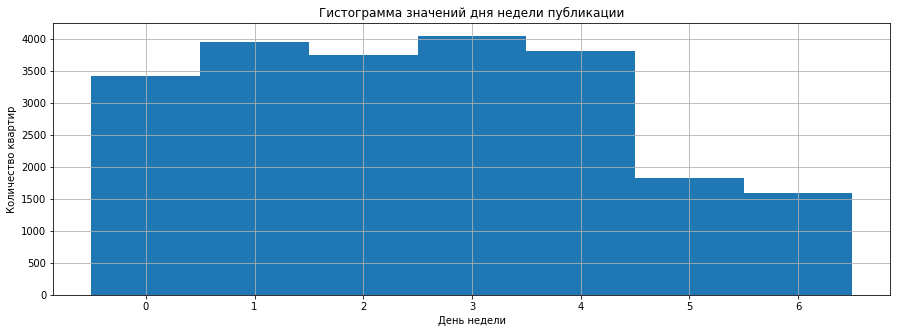

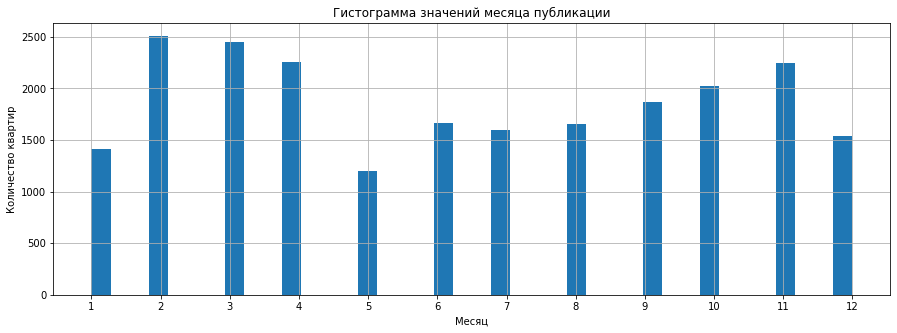

In [ ]:
data.hist(column='weekday_exposition', bins=7, range=(-0.5,6.5),figsize=(15,5))
plt.title('Гистограмма значений дня недели публикации')
plt.xlabel('День недели')
plt.ylabel('Количество квартир')
plt.show()

data.hist(column='month_exposition',range=(1,12), bins = 40, figsize=(15,5))
plt.locator_params(axis='x', nbins=20)
plt.title('Гистограмма значений месяца публикации')
plt.xlabel('Месяц')
plt.ylabel('Количество квартир')
plt.show()

Большинство квартир было выставлено на продажу во вторник и четверг, а наименьшее - в субботу и воскресенье. Самые активные по продажам месяцы: февраль, март, апрель и ноябрь. В мае публиковалось меньше всего объявлений.

Рост числа объявлений в феврале можно объяснить влиянием сезонности на рынок недвижимости. Весной и осенью обычно наблюдается рост, а летом и зимой, особенно после нового года, спад. Лучшим для совершения сделок принято считать деловой сезон, который длится с сентября по май. Внутри него наиболее удачным временем считаются весна и осень. На этом фоне февраль контрастирует с январем, который традиционно характеризуется "затишьем" на рынке недвижимости, в феврале же отложенный спрос и предложение начинают менять динамику рынка.

#### Анализ времени продажи жилья

count    19413.000000
mean       175.167362
std        205.753360
min          3.000000
25%         45.000000
50%         94.000000
75%        227.000000
max       1200.000000
Name: days_exposition, dtype: float64

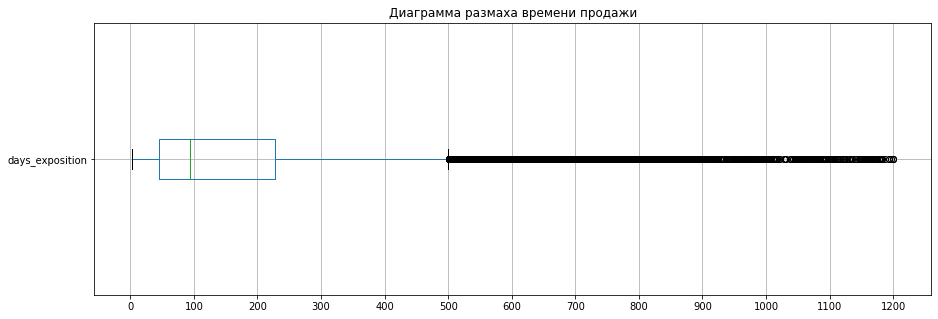

In [ ]:
# создадим новую переменную и сохраним в ней датасет, исключив строки с пропусками в days_exposition:
days_exp_clean = data.query('days_exposition != -1')

# посмотрим общее описание данных:
display(days_exp_clean['days_exposition'].describe())

# построим диаграмму размаха для days_exposition:
days_exp_clean.boxplot(column='days_exposition', vert=False, figsize=(15,5))
plt.locator_params(axis='x', nbins=20)
plt.title('Диаграмма размаха времени продажи')
plt.show()

Среднее время продажи составляет 175 дней, медианное - 94 дня. Характерный разброс данных начинается около 0 и заканчивается около 500 дней. Отметим, что среднее значение почти в два раза превышает медианное, это можно объяснить тем, что присутствует много данных с высокими значениями, которые влияют на среднее, но не на медиану.

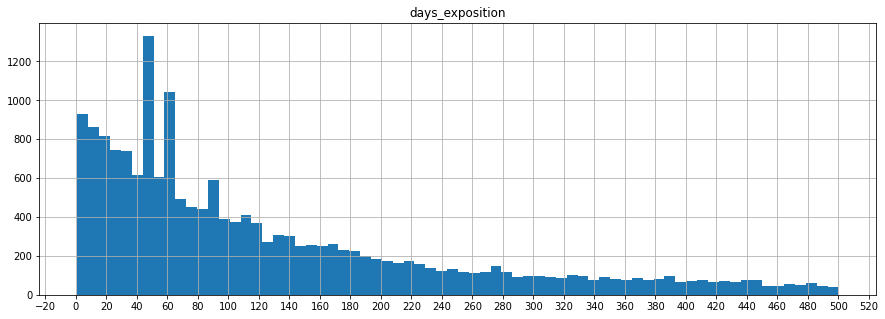

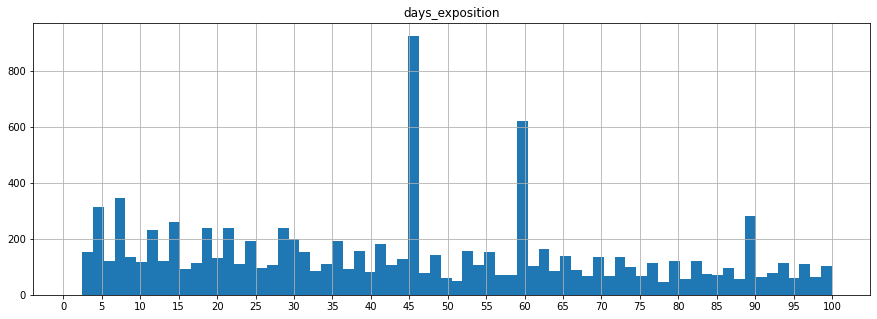

In [ ]:
# построим гистограмму для нормальных значений:
days_exp_clean.hist(column='days_exposition',range=(1,500), bins = 70, figsize=(15,5))
plt.locator_params(axis='x', nbins=50)
plt.show()
days_exp_clean.hist(column='days_exposition',range=(1,100), bins = 70, figsize=(15,5))
plt.locator_params(axis='x', nbins=30)
plt.show()

На гистограмме видны пики продаж через 45 дней и 60 дней . Можно предположить, что 45 и 60 дней - это беплатное время размещения недвижимости, по истечении которого объявление не было продлено и автоматически закрылось.

Прочитав условия размещения объявления на сервисе Яндекс.Недвижимость, можно убедиться, что действительно существуют бесплатные сроки публикации в зависимости от цены объекта недвижимости: до 4,5 млн — 45 дней, от 4,5 до 10 млн — 60 дней. В настоящее время для Санкт-Петербурга и Ленинградской области действуют иные тарифы и условия, однако, можно предположить, что во время размещения исследуемых данных применялись вышеупомянутые правила и для этих регионов.

Если говорить о быстрых и долгих продажах, то для определния границ используем квартили диаграммы размаха. Исходя из этого, продажу квартиры можно назвать быстрой, если она состоялась в течение 45 дней после размещения объявления, а после 227 дней продажу можно назвать долгой, после 500 дней - необычно долгой.

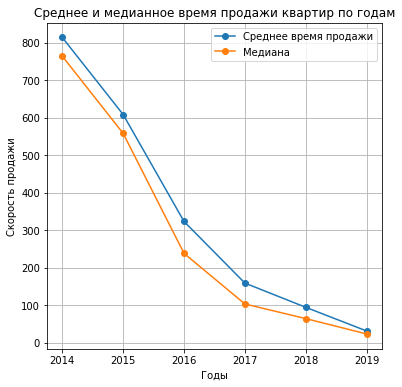

In [ ]:
# изменение скорости продаж по годам
sales_speed = days_exp_clean.pivot_table(index='year_exposition', values='days_exposition', aggfunc= ['mean','median'])
sales_speed.plot(
        style='o-',
        rot=0,
        grid=True,
        title='Среднее и медианное время продажи квартир по годам',
        xlabel='Годы',
        ylabel='Скорость продажи',
        figsize=(6, 6))
plt.legend(['Среднее время продажи', 'Медиана'])
plt.show()

In [ ]:
combined_table = pd.concat([days_exp_clean.value_counts('year_exposition'),sales_speed.round(1)], axis=1)
combined_table.columns = ['Количество объявлений', 'Среднее время продажи', 'Медианное время продажи']

display(combined_table)

,Количество объявлений,Среднее время продажи,Медианное время продажи
year_exposition,,,
2014,89,813.9,764
2015,971,608.3,558
2016,2563,323.1,238
2017,7556,158.7,103
2018,7213,94.1,64
2019,1021,31.0,23


Если посмотреть на среднее и медианное время продажи, то разница от года к году существенная. Если в 2014 году среднее время продажи было около 800 дней, то уже в 2015 этот показатель снизился до 600 дней, а в 2019 году квартиру в среднем можно было продать за месяц. У такой аномалии, на мой взгляд, есть несколько объяснений:
* нерепрезентативность выборки по некоторым годам (за 2014 год всего 89 объявлений, а за 2018 - 7213);
* разная ситуация на рынке недвижимости (спрос/предложение, курсы валют, условия кредитования и многое другое - тема для отдельного исследования;
* эффективность работы сервиса Яндекс.Недвижимость (со временем этот сервис мог набрать популярность, улучшить эффективность продаж и т.д.).

#### Изучим, какие факторы больше всего влияют на стоимость квартиры

In [ ]:
# создадим переменную и запишем в нее параметры, которые необходимы для изучения связи с ценой:
comparison_parameters = data[['last_price', 'total_area', 'living_area', 'kitchen_area', 'rooms']]

# выведем коэффициенты корреляции рассмтариваемых параметров, округлив значения до сотых:
display(comparison_parameters.corr().round(2))

,last_price,total_area,living_area,kitchen_area,rooms
last_price,1.00,0.76,0.67,0.60,0.47
total_area,0.76,1.00,0.94,0.62,0.79
living_area,0.67,0.94,1.00,0.40,0.87
kitchen_area,0.60,0.62,0.40,1.00,0.27
rooms,0.47,0.79,0.87,0.27,1.00


Наибольшая корреляция с ценой наблюдается у общей площади недвижимости, жилой площади и площади кухни, количество комнат влияет на цену слабо. Построим диаграммы рассеяния для наглядности:

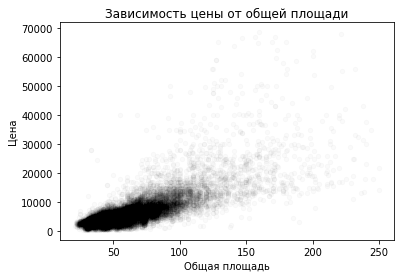

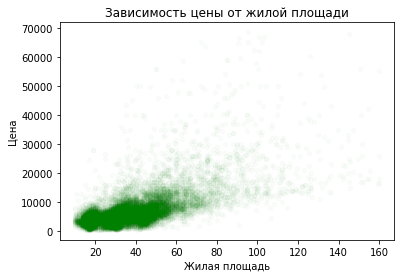

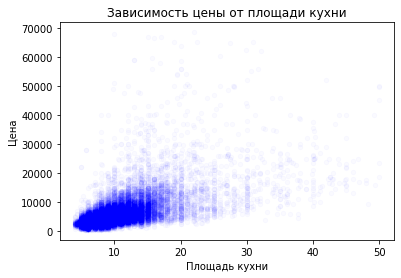

In [ ]:
data.plot(
    x='total_area',
    y='last_price',
    kind='scatter',
    title='Зависимость цены от общей площади',
    alpha=0.02,
    c='black',
    xlabel='Общая площадь',
    ylabel='Цена');

data.plot(
    x='living_area',
    y='last_price',
    kind='scatter',
    title='Зависимость цены от жилой площади',
    alpha=0.02,
    c='green',
    xlabel='Жилая площадь',
    ylabel='Цена');

data.plot(
    x='kitchen_area',
    y='last_price',
    kind='scatter',
    title='Зависимость цены от площади кухни',
    alpha=0.02,
    c='blue',
    xlabel='Площадь кухни',
    ylabel='Цена');

На представленных выше диаграммах видна линейная зависимость - чем больше площадь, тем выше цена. При этом после определнных значений эта взаимосвязь начинает ослабевать. Например, линейная связь между ценой и общей площадью начинает ослабевать после преодоления отметки в 100 м2.

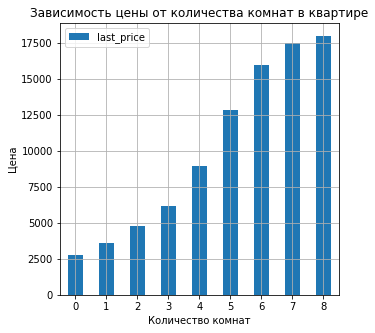

In [ ]:
# сгруппируем данные цены и количества комнат методом pivot_table и построим столбчатую диаграмму по медианным значениям цены:
data.pivot_table(
    index='rooms',
    values='last_price',
    aggfunc= 'median').plot(
        kind='bar',
        rot=0,
        grid=True,
        title= 'Зависимость цены от количества комнат в квартире',
        xlabel='Количество комнат',
        ylabel='Цена',
        figsize=(5, 5))
plt.show()

Можно заметить прямую и ожидаемую зависимость: чем больше комнат, тем выше стоимость объекта.

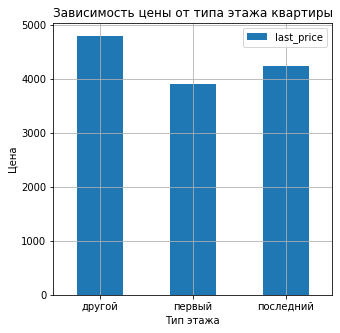

In [ ]:
# сгруппируем данные цены и типа этажа и построим столбчатую диаграмму по медианным значениям цены:
data.pivot_table(
    index='floor_type',
    values='last_price',
    aggfunc= 'median').plot(
        kind='bar',
        rot=0,
        grid=True,
        title= 'Зависимость цены от типа этажа квартиры',
        xlabel='Тип этажа',
        ylabel='Цена',
        figsize=(5, 5))
plt.show()

Квартиры на первом и последнем этажах в целом дешевле по сравнению с квартирами на других этажах. Это может быть обусловлено тем, что проживание на этих этажах считается менее удобным, чем на других.

Построим графики зависимости цены от даты публикации объявления (дня недели, месяца, года):

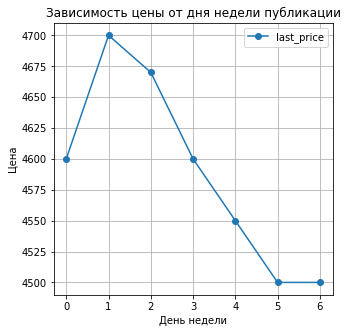

In [ ]:
data.pivot_table(
    index='weekday_exposition',
    values='last_price',
    aggfunc= 'median').plot(
        style='o-',
        rot=0,
        grid=True,
        figsize=(5, 5),
        title ='Зависимость цены от дня недели публикации',
        xlabel='День недели',
        ylabel='Цена')
plt.show()

Наибольшая медианная цена у публикаций сделанных во вторник, наименьшая - в выходные. Как мы ранее выяснили, больше всего объявлений публикуется во вторник и четверг, а меньше всего в субботу и воскресенье. Можно предположить, что в выходные размещаются в основном частные объявления (в отличие от будней, когда на рынок выходят еще и агенства), поэтому и существует такая разница в медианной цене и количестве объявлений.

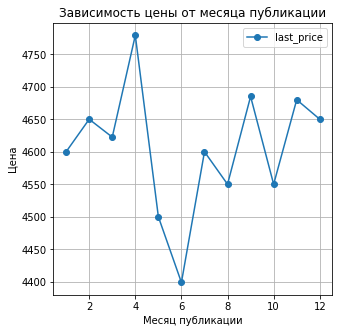

In [ ]:
data.pivot_table(
    index='month_exposition',
    values='last_price',
    aggfunc= 'median').plot(
        style='o-',
        rot=0,
        grid=True,
        figsize=(5, 5),
        title ='Зависимость цены от месяца публикации',
        xlabel='Месяц публикации',
        ylabel='Цена')
plt.show()

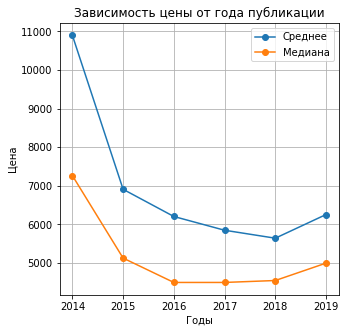

In [ ]:
data.pivot_table(
    index='year_exposition',
    values='last_price',
    aggfunc=['mean', 'median']).plot(
        style='o-',
        rot=0,
        grid=True,
        figsize=(5, 5),
        title='Зависимость цены от года публикации',
        xlabel='Годы',
        ylabel='Цена')
plt.legend(['Среднее', 'Медиана'])
plt.show()


Между датой публикации и ценой не прослеживается какой либо зависимости, распределения цен случайны. Можно отметить лишь несколько общих тенденций:
* наименьшая медианная стоимость наблюдается у квартир, выставленных на продажу в мае и июне, возможно, это связано с низким спросом в эти месяцы ввиду различных факторов;
* с 2014 г. медианная цена на недвижимость снижалась, достигнув минимальной отметки в 2017 году, а с 2018 года вновь начала подниматься.

Рассмотрим зависимость цены от года публикации подробнее:

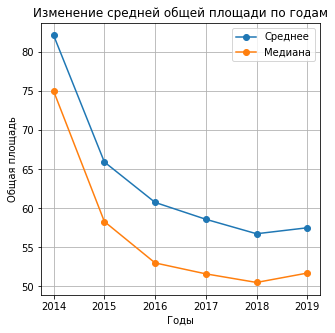

In [ ]:
data.pivot_table(
    index='year_exposition',
    values='total_area',
    aggfunc=['mean', 'median']).plot(
        style='o-',
        rot=0,
        grid=True,
        figsize=(5, 5),
        title='Изменение средней общей площади по годам',
        xlabel='Годы',
        ylabel='Общая площадь')
plt.legend(['Среднее', 'Медиана'])
plt.show()

Наибольший коэффициент корреляции цена имеет с общей площадью. График изменения средней площади по годам повторяет график изменения средней цены. Сравним количество объявлений по годам:

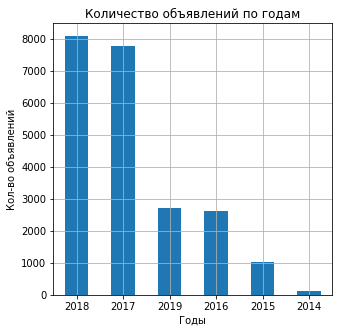

In [ ]:
data.value_counts('year_exposition').plot(
        kind='bar',
        rot=0,
        grid=True,
        title= 'Количество объявлений по годам',
        xlabel='Годы',
        ylabel='Кол-во объявлений',
        figsize=(5, 5))
plt.show()

Объявления за 2018 и 2017 годы составляют бОльшую часть нашего датасета. Выборка по годам нерепрезентативна, поэтому сложно говорить о каких-либо зависимостях, когда группы данных столь сильно отличаются по объему.

#### Посчитаем среднюю цену 1 м2 в 10 населённых пунктах с наибольшим числом объявлений

,price_of_sqm
locality_name,
санкт-петербург,112.00
пушкин,102.59
поселок кудрово,92.15
поселок парголово,90.01
мурино,85.43
поселок шушары,78.25
колпино,75.31
гатчина,68.75
всеволожск,68.54


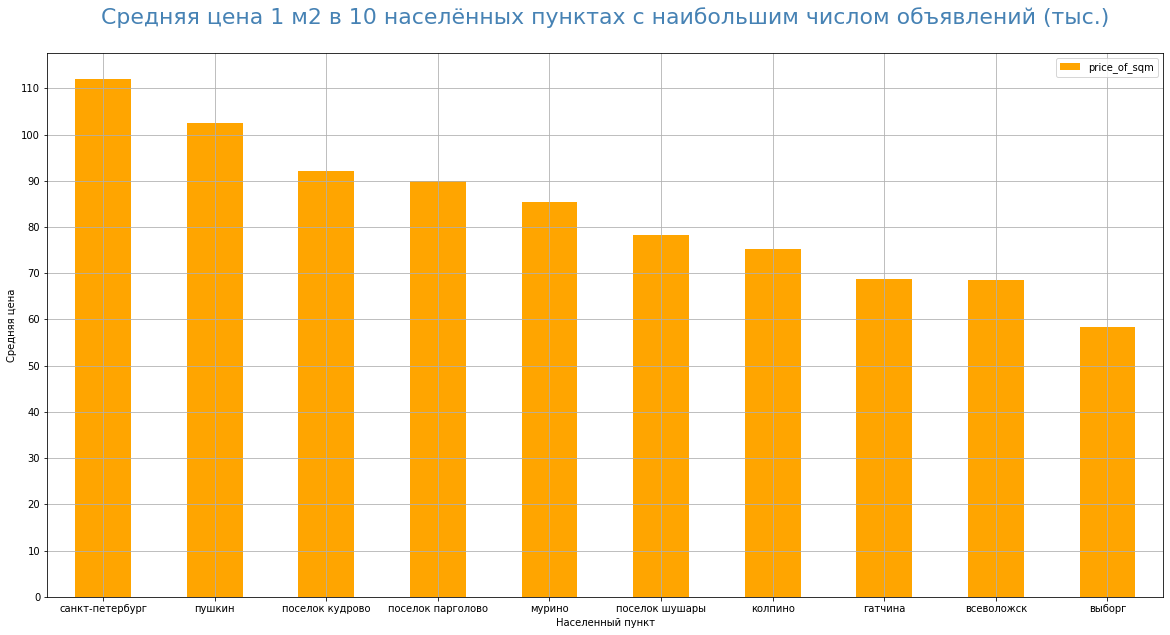

In [ ]:
# создадим переменную для сортировки названий 10 населенных с наибольшим числом объявлений
name_of_top_10 = data['locality_name'].value_counts().head(10)

# запишем в новую переменную строки из нашего датасета, которые относятся к нужным локациям
top_10 = data.query('locality_name in @name_of_top_10.index')

# найдем медианную стоимость 1 м2 для выбранных локаций
top_10_comparison = top_10.pivot_table(
    index='locality_name',
    values='price_of_sqm',
    aggfunc= 'mean').sort_values(
             'price_of_sqm', ascending=False).round(2)
display(top_10_comparison)

# построим график
top_10_comparison.plot(
    kind='bar',
    figsize=(20, 10),
    color ='orange',
    rot=0,
    grid=True,
    ylabel='Средняя цена',
    xlabel='Населенный пункт')

plt.title('Средняя цена 1 м2 в 10 населённых пунктах с наибольшим числом объявлений (тыс.)' + "\n" , fontsize=22, color='SteelBlue')
plt.yticks(range(0, 120, 10))
plt.show()

Наибольшая средняя стоимость 1 м2 ожидаемо оказалась в Санкт-Петербурге, немного меньше цена за квадратный метр в Пушкине, на третьем месте по стоимости располагается п. Кудрово.

Наименьшая средняя цена квадратного метра среди рассматриваемых населенных пунктов в Выборге, Всеволожске и Гатчине.

#### Изучим, как стоимость объектов зависит от расстояния до центра города (для Санкт-Петербурга)

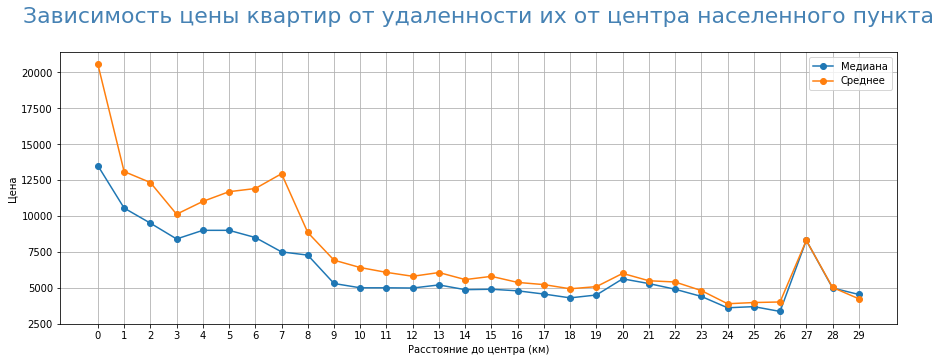

In [ ]:
# отфильтруем нужные нам квартиры:
filtered_flats = data.query('locality_name == "санкт-петербург" and distance_to_center != -1')

# Сгруппируем данные по квартирам Санкт-Петербурга, которые нужны для вычисления средней стоимости каждого километра:
flats_spb = filtered_flats.pivot_table(
    index = 'distance_to_center',
    values = 'last_price',
    aggfunc = ['median','mean'])

# Построим график зависимости цены квартир от удаленности их от центра:
flats_spb.plot(
        style='o-',
        rot=0,
        grid=True,
        figsize=(15,5),
        ylabel='Цена',
        xlabel='Расстояние до центра (км)')
plt.title('Зависимость цены квартир от удаленности их от центра населенного пункта' + "\n" , fontsize=22, color='SteelBlue')
plt.xticks(range(0, 30))
plt.legend(['Медиана', 'Среднее'])
plt.show()

Некоторая связь между ценой объекта и расстоянием до центра города прослеживается. Чем дальше квартира от центра, тем она дешевле. Наиболее резкое падение цены происходит до 10 километра, затем средняя цена меняется незначительно. Однако в целом нельзя сказать, что корреляция цены и удаленности объекта от центра очень большая, так как есть много других параметов, влияющих на ценообразование.
   
Попробуем объяснить пик и провал на 7 и 3 километре соответственно, а также выброс на 27 километре:

In [ ]:
display(filtered_flats.query('distance_to_center == 27'))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_of_sqm,weekday_exposition,month_exposition,year_exposition,floor_type,distance_to_center
748,13,14350.0,74.0,2017-11-28,2,3.13,5,30.0,3,False,...,1496.0,0,-1.0,128,193.918919,1,11,2017,другой,27
5961,6,2250.0,32.0,2018-02-27,1,2.65,2,16.5,2,False,...,-1.0,0,-1.0,178,70.312500,1,2,2018,последний,27


Квартир расположенных на 27 километре в нашем датасете всего 2. Цена одной квартиры в 7 раз больше цены другой квартиры. Соответственно ввиду нерепрезентативной выборки на этом километре и образовался вброс.

Посмотрим, что не так с квартирами на 7 и 3 километре:

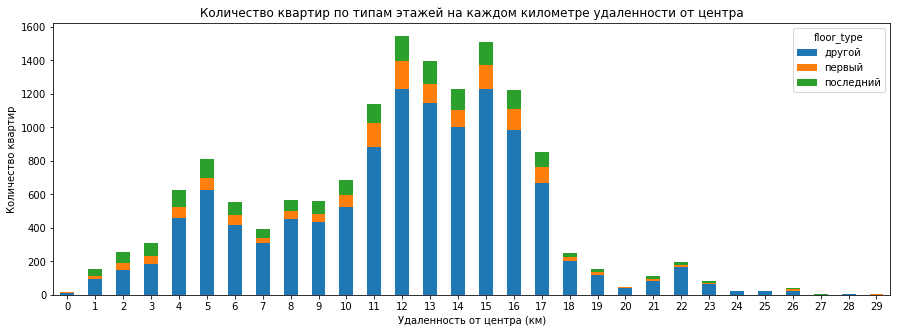

In [ ]:
# сгруппируем квартиры по распределению типов этажей на каждом километре и построим график
km_and_type_floor = filtered_flats.pivot_table(
    index='distance_to_center',
    columns='floor_type',
    aggfunc='size')

km_and_type_floor.plot(
    kind='bar',
    figsize=(15, 5),
    rot=0,
    stacked=True)
plt.title('Количество квартир по типам этажей на каждом километре удаленности от центра')
plt.xlabel('Удаленность от центра (км)')
plt.ylabel('Количество квартир')
plt.show()

Нельзя сказать, что распределение типов этажей квартиры на 3, 5 и 7 км кардинально отличается от распределений на других этажах. Однако можно заметить, что количество квартир с 0 по 3 км растет медленно, а на 4 и 5 км увеличивается резко в 2 - 2.5 раза, а затем происходит спад в 2 раза на 7 км, и после этого вновь  количество квартир начинает расти. Такая разница в объемах данных скорее всего и образует провалы и пики при распределении цен.

Проверим данную гипотезу. Посмотрим на распределение стоимости квартир, расположенных до 10 км:

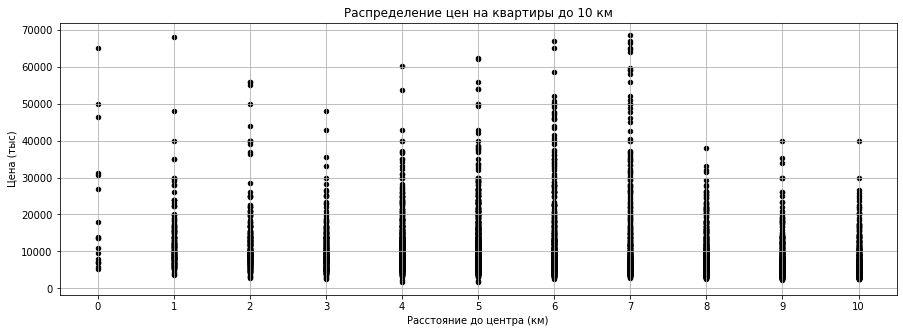

In [ ]:
filtered_flats.query('distance_to_center <= 10').plot(
    x='distance_to_center',
    y='last_price',
    kind='scatter',
    title='Распределение цен на квартиры до 10 км',
    alpha=1,
    c='black',
    grid =True,
    figsize=(15,5),
    xlabel='Расстояние до центра (км)',
    ylabel='Цена (тыс)')
plt.xticks(range(0, 11));

Наша гипотеза нашла подтверждение, количество дорогостоящих квартир (возьмем границу в 40 млн руб) до 3-го км снижается, а после 3-го и до 7-го количество таких квартир начинает возрастать. После 8-го и до 10-го километра квартир стоимостью больше 40 млн рублей уже нет. Подводя итог, можно сказать, что к пику и спаду на 7 и 3 км привело неравномерное распределение количества дорогостоящих квартир.

Можно проверить еще изменение средней площади квартиры от километра к километру в Санкт-Петербурге:

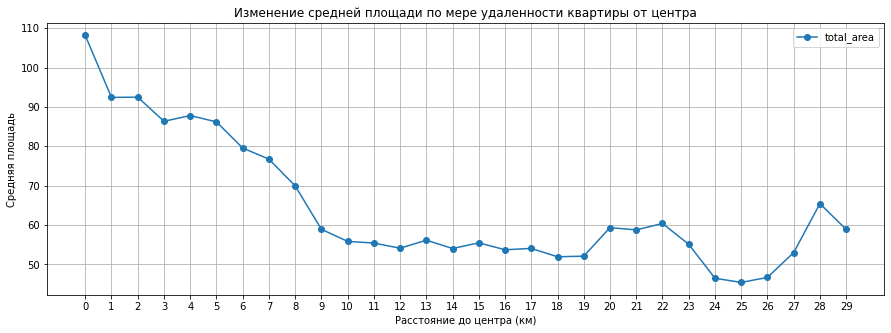

In [ ]:
filtered_flats.groupby('distance_to_center')['total_area'].mean().plot(
        style='o-',
        rot=0,
        grid=True,
        figsize=(15,5),
        legend=True,
        ylabel='Средняя площадь',
        xlabel='Расстояние до центра (км)')
plt.title('Изменение средней площади по мере удаленности квартиры от центра')
plt.xticks(range(0, 30));

На графике видно, что до 10-го км средняя общая площадь также как и средняя цена довольно резко снижается, но это происходит без пиков и больших провалов.

### Общий вывод

В проведенном исследовании нами был изучен архив объявлений за несколько лет о продаже квартир в Санкт-Петербурге и соседних населённых пунктах. Зафикисируем основные выводы, выявленные особенности и закономерности:

1. **Параметры большинства квартир:**
    * наибольшую часть рынка составляют квартиры общей площадью 30-46 м2, жилой площадью 15-35 м2 и кухней 6-11 м2;
    * цена большинства квартир варьируется от 3 до 5 млн рублей;
    * продаваемые квартиры обычно имеют от 1 до 3 комнат, высоту потолков 2.5-2.7 м., располагаются с 1 по 5 этаж;
    * удаленность от центра населенного пункта обычно составляет 10-17 км, от аэропорта - 10-37 км, ближайший парк находится в 300-600 м.


2. **Время продажи жилья:**
    * медианное время продажи квартиры составляет 94 дня, большинство объявлений находилось на публикации от 45 до 227 дней, соответственно долгие и быстрые продажи можно определить как не входящие в данный промежуток времени сделки;


3. **Факторы, влияющие на стоимость квартиры:**
    * общая площадь и связанные с ней жилая площадь и площадь кухни оказывают наибольшее влияние на стоимость квартиры. Если рассматривать корреляцию детальнее, можно заметить, что есть определенны границы, когда связь начинает ослабевать. Для общей площади эта граница находится в районе 100 м2, для жилой площади - после 60 м2, для площади кухни - после 18 м2. Можно предположить, что соответсвующих данным параметрам объектов в целом немного в выборке, из-за чего связь менее очевидна, а, возможно, на цену квартиры с большим метражом начинают оказывать бОльшее влияние другие факторы;
    * между количеством комнат и ценой квартир существует прямая зависимость: чем больше комнат, тем выше цена;
    * этаж квартиры не сильно влияет на стоимость, в среднем объекты, расположенные на первом и последних этажах, дешевле;
    * между датой публикации и ценой квартиры не прослеживается какой-либо устойчивой связи, мы отметили лишь несколько особенностей. Наибольша медианная стоимость квартир наблюдается в объявлениях, опубликованных в апреле, после чего идет резкий спад медианной цены в мае и июне. Общая же тенденция по годам следующая: с 2014 г. медианная цена на недвижимость снижалась, достигнув минимальной отметки в 2017 году, а с 2018 года вновь начала подниматься.


4. **Средняя цена квадратного метра в 10 населённых пунктах с наибольшим числом объявлений:**
    * наибольшая средняя цена квадратного метра принадлежит Санкт-Петербургу и составляет 112 тыс. руб, на втором месте по данному показателю г. Пушкин (102 тыс. руб.), на третьем - п. Кудрово (92 тыс. руб.);
    * наименьшая стоимость квадратного метра в изучаемой выборке оказалась у Выборга - 58 тыс. руб.


5. **Влияние удаленности квартиры от центра населенного пункта на ее стоимость:**
    * Вполне предсказуемо, удаленность от центра оказывает влияние на ценнообразование на рынке жилой недвижимости. По мере удаления от центра города стоимость квартир падает, с 0 по 10 км это падение от километра к километру довльно резкое, а после разница между километрами сглаживается, падение цены в этих промежутках незначительно, в целом тенденция перестает быть линейной.

**Баг-репорт**

*Во время проведения нашего исследования было замечено, что некоторые квартиры в объявлениях содержат параметр studio=False, но при этом имеют 0 комнат. Нами было сделано предположение, что такая ситуация может возникать из-за отсутствия автоматического проставления параметра 'True' в графе "студия", если человек выбирает количество комнат равное 0, и наоборот. Стоит рассмотреть внедрение автоматизации заполнения этих зависимых параметров.*